In [1]:
#Loading and installing libraries
import numpy as np 
import pandas as pd
import seaborn as sns
from joypy import joyplot
import matplotlib.pyplot as plt

import optuna
import sklearn.metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb
import xgboost

In [2]:
pd.set_option('display.max_columns', 500)
test = pd.read_csv('full.csv', low_memory=False)
test

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,game_id,Temperature,Humidity,Precipitation,WindSpeed,season,kicker,oppMinDist,closestOpp(nflId),oppDir,oppX,oppY,mateMinDist,closestMate(nflId),mateX,mateY,diffDir,oppMateDistRatio,varX,varY,varS,oppVar,oppMean,mateVar,mateMean,oppDirVar,oppDirMean,meanOppMateDistRatio,varOppMateDistRatio
0,2018-12-30T21:25:32.200,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right,J.Tucker kicks 60 yards from BAL 35 to CLE 5. ...,1,0,0,BAL,Kickoff,Return,39470.0,44837.0,NaN,BAL,35,15:00:00,NaN,NaN,NaN,0,0,NaN,60.0,29.0,31,45,2018123000,42.98,70.0,0.0,0.00,2018,1,18.062652,46244.0,211.51,57.95,22.40,3.566090,44999.0,117.55,32.32,83.07,0.298952,138.239249,21.155998,2.414792,27.77672,11.126591,12.260801,6.559639,692.062265,37.200297,0.243711,0.012922
1,2018-12-30T21:25:32.300,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right,J.Tucker kicks 60 yards from BAL 35 to CLE 5. ...,1,0,0,BAL,Kickoff,Return,39470.0,44837.0,NaN,BAL,35,15:00:00,NaN,NaN,NaN,0,0,NaN,60.0,29.0,31,45,2018123000,42.98,70.0,0.0,0.00,2018,1,17.626154,46244.0,210.30,57.95,22.39,3.527450,44999.0,117.55,32.32,82.49,0.291720,138.239249,21.155998,2.414792,27.77672,11.126591,12.260801,6.559639,692.062265,37.200297,0.243711,0.012922
2,2018-12-30T21:25:32.400,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right,J.Tucker kicks 60 yards from BAL 35 to CLE 5. ...,1,0,0,BAL,Kickoff,Return,39470.0,44837.0,NaN,BAL,35,15:00:00,NaN,NaN,NaN,0,0,NaN,60.0,29.0,31,45,2018123000,42.98,70.0,0.0,0.00,2018,1,17.168055,46244.0,208.41,57.94,22.38,3.544968,44999.0,117.55,32.32,80.26,0.284084,138.239249,21.155998,2.414792,27.77672,11.126591,12.260801,6.559639,692.062265,37.200297,0.243711,0.012922
3,2018-12-30T21:25:32.500,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right,J.Tucker kicks 60 yards from BAL 35 to CLE 5. ...,1,0,0,BAL,Kickoff,Return,39470.0,44837.0,NaN,BAL,35,15:00:00,NaN,NaN,NaN,0,0,NaN,60.0,29.0,31,45,2018123000,42.98,70.0,0.0,0.00,2018,1,16.705176,46244.0,210.60,57.93,22.36,3.618757,44999.0,117.55,32.32,83.25,0.276364,138.239249,21.155998,2.414792,27.77672,11.126591,12.260801,6.559639,692.062265,37.200297,0.243711,0.012922
4,2018-12-30T21:25:32.600,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right,J.Tucker kicks 60 yards from BAL 35 to CLE 5. ...,1,0,0,BAL,Kickoff,Return,39470.0,44837.0,NaN,BAL,35,15:00:00,NaN,NaN,NaN,0,0,NaN,60.0,29.0,31,45,2018123000,42.98,70.0,0.0,0.00,2018,1,16.218733,46244.0,213.20,57.92,22.34,3.740976,44999.0,117.55,32.32,88.45,0.268258,138.239249,21.155998,2.414792,27.77672,11.126591,12.260801,6.559639,692.062265,37.200297,0.243711,0.012922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36267292,2020-09-15T05:22:39.200,117.23,32.02,1.13,0.85,0.12,NaN,NaN,None,NaN,football,NaN,NaN,football,81,2020091401,4280,right,S.Gostkowski kicks 65 yards from TEN 35 to end...,4,0,0,TEN,Kickoff,Touchback,30932.0,NaN,NaN,TEN,35,00:17:00,NaN,NaN,NaN,14,16,NaN,74.0,NaN,40,45,2020091401,71.06,27.0,0.0,5.59,2020,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36267293,2020-09-15T05:22:39.300,117.31,32.10,1.17,0.86,0.12,NaN,NaN,None,NaN,footba

In [3]:
kicker = test[test['kicker']==1]
kicker

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,game_id,Temperature,Humidity,Precipitation,WindSpeed,season,kicker,oppMinDist,closestOpp(nflId),oppDir,oppX,oppY,mateMinDist,closestMate(nflId),mateX,mateY,diffDir,oppMateDistRatio,varX,varY,varS,oppVar,oppMean,mateVar,mateMean,oppDirVar,oppDirMean,meanOppMateDistRatio,varOppMateDistRatio
0,2018-12-30T21:25:32.200,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right,J.Tucker kicks 60 yards from BAL 35 to CLE 5. ...,1,0,0,BAL,Kickoff,Return,39470.0,44837.0,NaN,BAL,35,15:00:00,NaN,NaN,NaN,0,0,NaN,60.0,29.0,31,45,2018123000,42.98,70.0,0.0,0.00,2018,1,18.062652,46244.0,211.51,57.95,22.40,3.566090,44999.0,117.55,32.32,83.07,0.298952,138.239249,21.155998,2.414792,27.776720,11.126591,12.260801,6.559639,692.062265,37.200297,0.243711,0.012922
1,2018-12-30T21:25:32.300,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right,J.Tucker kicks 60 yards from BAL 35 to CLE 5. ...,1,0,0,BAL,Kickoff,Return,39470.0,44837.0,NaN,BAL,35,15:00:00,NaN,NaN,NaN,0,0,NaN,60.0,29.0,31,45,2018123000,42.98,70.0,0.0,0.00,2018,1,17.626154,46244.0,210.30,57.95,22.39,3.527450,44999.0,117.55,32.32,82.49,0.291720,138.239249,21.155998,2.414792,27.776720,11.126591,12.260801,6.559639,692.062265,37.200297,0.243711,0.012922
2,2018-12-30T21:25:32.400,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right,J.Tucker kicks 60 yards from BAL 35 to CLE 5. ...,1,0,0,BAL,Kickoff,Return,39470.0,44837.0,NaN,BAL,35,15:00:00,NaN,NaN,NaN,0,0,NaN,60.0,29.0,31,45,2018123000,42.98,70.0,0.0,0.00,2018,1,17.168055,46244.0,208.41,57.94,22.38,3.544968,44999.0,117.55,32.32,80.26,0.284084,138.239249,21.155998,2.414792,27.776720,11.126591,12.260801,6.559639,692.062265,37.200297,0.243711,0.012922
3,2018-12-30T21:25:32.500,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right,J.Tucker kicks 60 yards from BAL 35 to CLE 5. ...,1,0,0,BAL,Kickoff,Return,39470.0,44837.0,NaN,BAL,35,15:00:00,NaN,NaN,NaN,0,0,NaN,60.0,29.0,31,45,2018123000,42.98,70.0,0.0,0.00,2018,1,16.705176,46244.0,210.60,57.93,22.36,3.618757,44999.0,117.55,32.32,83.25,0.276364,138.239249,21.155998,2.414792,27.776720,11.126591,12.260801,6.559639,692.062265,37.200297,0.243711,0.012922
4,2018-12-30T21:25:32.600,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right,J.Tucker kicks 60 yards from BAL 35 to CLE 5. ...,1,0,0,BAL,Kickoff,Return,39470.0,44837.0,NaN,BAL,35,15:00:00,NaN,NaN,NaN,0,0,NaN,60.0,29.0,31,45,2018123000,42.98,70.0,0.0,0.00,2018,1,16.218733,46244.0,213.20,57.92,22.34,3.740976,44999.0,117.55,32.32,88.45,0.268258,138.239249,21.155998,2.414792,27.776720,11.126591,12.260801,6.559639,692.062265,37.200297,0.243711,0.012922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36265422,2020-09-15T05:22:39.200,73.40,29.75,1.40,0.43,0.14,16.51,30.30,None,30932.0,Stephen Gostkowski,3.0,K,away,81,2020091401,4280,right,S.Gostkowski kicks 65 yards from TEN 35 to end...,4,0,0,TEN,Kickoff,Touchback,30932.0,NaN,NaN,TEN,35,00:17:00,NaN,NaN,NaN,14,16,NaN,74.0,NaN,40,45,2020091401,71.06,27.0,0.0,5.59,2020,1,7.882360,48447.0,324.77,77.80,23.21,7.744114,46846.0,117.55,32.32,294.47,0.193287,120.496287,0.604880,2.078807,17.314155,12.513711,5.055063,5.391687,6458.96

In [4]:
kicker['specialTeamsPlayType'].value_counts()

Punt           634324
Kickoff        608799
Extra Point    178704
Field Goal     147654
Name: specialTeamsPlayType, dtype: int64

In [5]:
kicker['specialTeamsResult'].value_counts()

Return                   591561
Touchback                328662
Kick Attempt Good        285443
Fair Catch               141315
Downed                    96105
Out of Bounds             57706
Kick Attempt No Good      33789
Muffed                    23590
Blocked Kick Attempt       6929
Blocked Punt               3453
Kickoff Team Recovery       928
Name: specialTeamsResult, dtype: int64

In [6]:
punt = kicker[kicker['specialTeamsPlayType']=='Punt']
punt

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,game_id,Temperature,Humidity,Precipitation,WindSpeed,season,kicker,oppMinDist,closestOpp(nflId),oppDir,oppX,oppY,mateMinDist,closestMate(nflId),mateX,mateY,diffDir,oppMateDistRatio,varX,varY,varS,oppVar,oppMean,mateVar,mateMean,oppDirVar,oppDirMean,meanOppMateDistRatio,varOppMateDistRatio
12696,2018-12-30T21:57:58.300,25.18,23.833333,0.00,0.00,0.01,278.03,288.96,None,34723.0,Britton Colquitt,4.0,P,away,1,2018123000,892,left,(2:55) (Punt formation) B.Colquitt punts 48 ya...,1,4,1,CLE,Punt,Fair Catch,34723.0,43349.0,NaN,CLE,29,02:55:00,NaN,NaN,NaN,10,7,NaN,48.0,NaN,48,81,2018123000,42.98,70.0,0.0,0.00,2018,1,14.461552,40042.0,349.56,39.59,22.613333,7.937115,42608.0,117.55,32.32,60.60,0.184078,14.695907,14.063000,3.018980,19.394490,6.860574,22.716412,9.431662,9810.235513,129.546829,0.084016,0.003244
12697,2018-12-30T21:57:58.400,25.19,23.833333,0.00,0.00,0.00,277.43,286.96,None,34723.0,Britton Colquitt,4.0,P,away,2,2018123000,892,left,(2:55) (Punt formation) B.Colquitt punts 48 ya...,1,4,1,CLE,Punt,Fair Catch,34723.0,43349.0,NaN,CLE,29,02:55:00,NaN,NaN,NaN,10,7,NaN,48.0,NaN,48,81,2018123000,42.98,70.0,0.0,0.00,2018,1,14.465856,40042.0,351.02,39.60,22.563333,7.935824,42608.0,117.55,32.32,64.06,0.184142,14.695907,14.063000,3.018980,19.394490,6.860574,22.716412,9.431662,9810.235513,129.546829,0.084016,0.003244
12698,2018-12-30T21:57:58.500,25.19,23.833333,0.00,0.00,0.01,277.43,274.36,None,34723.0,Britton Colquitt,4.0,P,away,3,2018123000,892,left,(2:55) (Punt formation) B.Colquitt punts 48 ya...,1,4,1,CLE,Punt,Fair Catch,34723.0,43349.0,NaN,CLE,29,02:55:00,NaN,NaN,NaN,10,7,NaN,48.0,NaN,48,81,2018123000,42.98,70.0,0.0,0.00,2018,1,14.479382,40042.0,349.87,39.61,22.523333,7.945741,42608.0,117.55,32.32,75.51,0.184326,14.695907,14.063000,3.018980,19.394490,6.860574,22.716412,9.431662,9810.235513,129.546829,0.084016,0.003244
12699,2018-12-30T21:57:58.600,25.20,23.843333,0.00,0.00,0.01,278.33,266.10,None,34723.0,Britton Colquitt,4.0,P,away,4,2018123000,892,left,(2:55) (Punt formation) B.Colquitt punts 48 ya...,1,4,1,CLE,Punt,Fair Catch,34723.0,43349.0,NaN,CLE,29,02:55:00,NaN,NaN,NaN,10,7,NaN,48.0,NaN,48,81,2018123000,42.98,70.0,0.0,0.00,2018,1,14.465023,40042.0,352.65,39.60,22.473333,7.945741,42608.0,117.55,32.32,86.55,0.184105,14.695907,14.063000,3.018980,19.394490,6.860574,22.716412,9.431662,9810.235513,129.546829,0.084016,0.003244
12700,2018-12-30T21:57:58.700,25.20,23.843333,0.00,0.00,0.00,278.33,261.76,None,34723.0,Britton Colquitt,4.0,P,away,5,2018123000,892,left,(2:55) (Punt formation) B.Colquitt punts 48 ya...,1,4,1,CLE,Punt,Fair Catch,34723.0,43349.0,NaN,CLE,29,02:55:00,NaN,NaN,NaN,10,7,NaN,48.0,NaN,48,81,2018123000,42.98,70.0,0.0,0.00,2018,1,14.480556,41363.0,62.97,39.36,20.813333,7.945741,42608.0,117.55,32.32,198.79,0.183224,14.695907,14.063000,3.018980,19.394490,6.860574,22.716412,9.431662,9810.235513,129.546829,0.084016,0.003244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36262576,2020-09-15T05:07:49.100,56.63,30.543333,1.72,0.14,0.17,338.78,164.87,None,40113.0,Sam Martin,6.0,P,home,76,2020091401,3865,left,"(3:13) S.Martin punts 32 yards to TEN 10, Cent...",4,4,8,DEN,Punt,Fair Catch,40113.0,43584.0,NaN,TEN,42,03:13:00,NaN,NaN,NaN,14,13,NaN,32.0,NaN,32,52,2020091401,71.06,27.0,0.0,5.59,2020,1,8.191758,41997.0,265.97,64.31,27.693333,26.872389,44958.0,117.55,32.32,101.

In [7]:
punt['event'].value_counts()

None                        610003
punt                          5836
ball_snap                     5805
punt_received                 2340
tackle                        1884
first_contact                 1879
fair_catch                    1621
punt_land                     1526
out_of_bounds                 1069
punt_downed                    848
line_set                       380
touchback                      368
punt_muffed                    146
fumble_offense_recovered       136
fumble_defense_recovered       104
autoevent_kickoff               94
fumble                          76
touchdown                       44
punt_blocked                    39
punt_play                       34
penalty_flag                    23
man_in_motion                   21
kick_received                   20
safety                           5
lateral                          5
kick_recovered                   5
huddle_start_offense             3
kickoff_land                     2
huddle_break_offense

In [8]:
punt['specialTeamsResult'].value_counts()

Return           285115
Fair Catch       141038
Downed            95724
Out of Bounds     53734
Touchback         37670
Muffed            17590
Blocked Punt       3453
Name: specialTeamsResult, dtype: int64

In [10]:
punt['event'].value_counts()

punt    5836
Name: event, dtype: int64

In [11]:
# End Zone Distance
punt['EZ_dist'] = ((punt['x'] - 100)**2 + (punt['y'] - 26.33)**2)**0.5

/Users/benjenkins/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


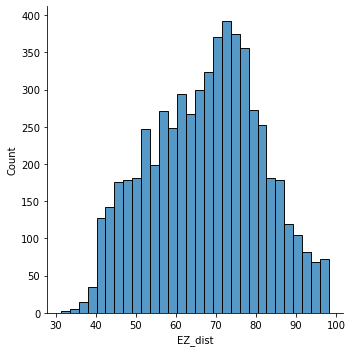

In [12]:
sns.displot(punt['EZ_dist']);

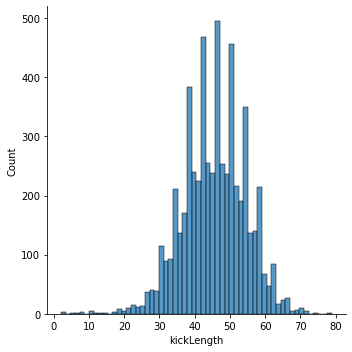

In [13]:
sns.displot(punt['kickLength']);

In [14]:
punt.columns

Index(['time', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event', 'nflId',
       'displayName', 'jerseyNumber', 'position', 'team', 'frameId', 'gameId',
       'playId', 'playDirection', 'playDescription', 'quarter', 'down',
       'yardsToGo', 'possessionTeam', 'specialTeamsPlayType',
       'specialTeamsResult', 'kickerId', 'returnerId', 'kickBlockerId',
       'yardlineSide', 'yardlineNumber', 'gameClock', 'penaltyCodes',
       'penaltyJerseyNumbers', 'penaltyYards', 'preSnapHomeScore',
       'preSnapVisitorScore', 'passResult', 'kickLength', 'kickReturnYardage',
       'playResult', 'absoluteYardlineNumber', 'game_id', 'Temperature',
       'Humidity', 'Precipitation', 'WindSpeed', 'season', 'kicker',
       'oppMinDist', 'closestOpp(nflId)', 'oppDir', 'oppX', 'oppY',
       'mateMinDist', 'closestMate(nflId)', 'mateX', 'mateY', 'diffDir',
       'oppMateDistRatio', 'varX', 'varY', 'varS', 'oppVar', 'oppMean',
       'mateVar', 'mateMean', 'oppDirVar', 'oppDirMean',
       'meanOpp

In [15]:
tests = punt[['s', 'a', 'dis', 'o', 'dir', 'event', 'frameId', 'gameId', 'playId', 'season', 'team', 'position',
       'displayName', 'quarter', 'oppMean', 'oppMinDist', 'oppMateDistRatio',
       'mateMinDist', 'diffDir', 'EZ_dist',
       'yardsToGo', 'preSnapHomeScore',
       'preSnapVisitorScore',
       'absoluteYardlineNumber',
            'Temperature', 'Humidity', 'Precipitation', 'WindSpeed',
       'kickLength']]
tests

,s,a,dis,o,dir,event,frameId,gameId,playId,season,team,position,displayName,quarter,oppMean,oppMinDist,oppMateDistRatio,mateMinDist,diffDir,EZ_dist,yardsToGo,preSnapHomeScore,preSnapVisitorScore,absoluteYardlineNumber,Temperature,Humidity,Precipitation,WindSpeed,kickLength
12726,2.02,1.10,0.21,275.17,286.31,punt,31,2018123000,892,2018,away,P,Britton Colquitt,1,6.388239,6.388239,0.075790,5.791692,204.89,72.753772,1,10,7,81,42.98,70.0,0.0,0.00,48.0
17325,2.01,1.21,0.21,91.13,115.55,punt,30,2018123000,1267,2018,away,P,Britton Colquitt,2,6.567930,6.567930,0.106202,6.054428,204.34,49.961358,7,17,7,62,42.98,70.0,0.0,0.00,48.0
23468,2.42,1.06,0.24,94.20,99.89,punt,32,2018123000,1976,2018,away,P,Britton Colquitt,2,5.066379,5.066379,0.046611,4.689755,178.79,95.149698,10,20,7,17,42.98,70.0,0.0,0.00,39.0
25469,2.26,0.84,0.23,278.91,282.06,punt,32,2018123000,2165,2018,home,P,Sam Koch,2,7.497906,7.497906,0.136040,6.490123,195.80,43.361206,17,20,7,52,42.98,70.0,0.0,0.00,36.0
30759,2.36,0.53,0.24,75.22,78.43,punt,32,2018123000,2502,2018,home,P,Sam Koch,3,6.471260,6.471260,0.080250,5.663506,173.90,69.354585,14,20,7,42,42.98,70.0,0.0,0.00,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36248423,2.78,1.86,0.28,264.90,122.69,punt,33,2020091401,2713,2020,home,P,Sam Martin,3,7.421220,7.421220,0.088991,6.834830,89.32,72.699685,14,7,7,38,71.06,27.0,0.0,5.59,53.0
36255645,1.94,1.54,0.20,92.95,113.49,punt,33,2020091401,3522,2020,away,P,Brett Kern,4,4.546405,4.546405,0.053640,4.024922,183.81,71.356141,5,14,13,40,71.06,27.0,0.0,5.59,50.0
36257786,2.98,1.73,0.30,89.09,300.37,punt,32,2020091401,3655,2020,home,P,Sam Martin,4,5.945057,5.945057,0.085685,5.462023,162.18,57.624187,3,14,13,66,71.06,27.0,0.0,5.59,52.0
36259877,2.33,1.60,0.24,87.10,109.13,punt,33,2020091401,3741,2020,away,P,Brett Kern,4,5.801146,5.801146,0.052936,5.037460,152.24,96.903105,10,14,13,14,71.06,27.0,0.0,5.59,47.0


In [16]:
a = tests['o'] - tests['dir']
tests['AngleDiff'] = np.absolute((a + 180) % 360 - 180)

/Users/benjenkins/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
tests.loc[tests['team'] == 'away', 'ScoreDiff'] = tests['preSnapVisitorScore'] - tests['preSnapHomeScore']
tests.loc[tests['team'] == 'home', 'ScoreDiff'] = tests['preSnapHomeScore'] - tests['preSnapVisitorScore']
tests

/Users/benjenkins/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
/Users/benjenkins/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,s,a,dis,o,dir,event,frameId,gameId,playId,season,team,position,displayName,quarter,oppMean,oppMinDist,oppMateDistRatio,mateMinDist,diffDir,EZ_dist,yardsToGo,preSnapHomeScore,preSnapVisitorScore,absoluteYardlineNumber,Temperature,Humidity,Precipitation,WindSpeed,kickLength,AngleDiff,ScoreDiff
12726,2.02,1.10,0.21,275.17,286.31,punt,31,2018123000,892,2018,away,P,Britton Colquitt,1,6.388239,6.388239,0.075790,5.791692,204.89,72.753772,1,10,7,81,42.98,70.0,0.0,0.00,48.0,11.14,-3.0
17325,2.01,1.21,0.21,91.13,115.55,punt,30,2018123000,1267,2018,away,P,Britton Colquitt,2,6.567930,6.567930,0.106202,6.054428,204.34,49.961358,7,17,7,62,42.98,70.0,0.0,0.00,48.0,24.42,-10.0
23468,2.42,1.06,0.24,94.20,99.89,punt,32,2018123000,1976,2018,away,P,Britton Colquitt,2,5.066379,5.066379,0.046611,4.689755,178.79,95.149698,10,20,7,17,42.98,70.0,0.0,0.00,39.0,5.69,-13.0
25469,2.26,0.84,0.23,278.91,282.06,punt,32,2018123000,2165,2018,home,P,Sam Koch,2,7.497906,7.497906,0.136040,6.490123,195.80,43.361206,17,20,7,52,42.98,70.0,0.0,0.00,36.0,3.15,13.0
30759,2.36,0.53,0.24,75.22,78.43,punt,32,2018123000,2502,2018,home,P,Sam Koch,3,6.471260,6.471260,0.080250,5.663506,173.90,69.354585,14,20,7,42,42.98,70.0,0.0,0.00,53.0,3.21,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36248423,2.78,1.86,0.28,264.90,122.69,punt,33,2020091401,2713,2020,home,P,Sam Martin,3,7.421220,7.421220,0.088991,6.834830,89.32,72.699685,14,7,7,38,71.06,27.0,0.0,5.59,53.0,142.21,0.0
36255645,1.94,1.54,0.20,92.95,113.49,punt,33,2020091401,3522,2020,away,P,Brett Kern,4,4.546405,4.546405,0.053640,4.024922,183.81,71.356141,5,14,13,40,71.06,27.0,0.0,5.59,50.0,20.54,-1.0
36257786,2.98,1.73,0.30,89.09,300.37,punt,32,2020091401,3655,2020,home,P,Sam Martin,4,5.945057,5.945057,0.085685,5.462023,162.18,57.624187,3,14,13,66,71.06,27.0,0.0,5.59,52.0,148.72,1.0
36259877,2.33,1.60,0.24,87.10,109.13,punt,33,2020091401,3741,2020,away,P,Brett Kern,4,5.801146,5.801146,0.052936,5.037460,152.24,96.903105,10,14,13,14,71.06,27.0,0.0,5.59,47.0,22.03,-1.0


In [18]:
tests.dropna(inplace=True)

/Users/benjenkins/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [21]:
X = tests.drop([
       'displayName', 'frameId', 'gameId', 'event', 'playId', 'season', 'team', 'position',
       'kickLength', 'preSnapHomeScore',
       'preSnapVisitorScore'], axis=1)
y = tests['kickLength']

In [22]:
#train test split: 75% train set and 25% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# summarize split
print('Train data rows = %d, columns = %d' % (X_train.shape[0], X_train.shape[1]))
print('Test data rows = %d, columns = %d' % (X_test.shape[0], X_test.shape[1]))

Train data rows = 7783, columns = 20
Test data rows = 2595, columns = 20


In [22]:
def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.25)
    dtrain = xgb.DMatrix(train_x, label=train_y)
    dvalid = xgb.DMatrix(valid_x, label=valid_y)

    param = {
        "silent": 1,
        "objective": "reg:squarederror",
        "eval_metric": "rmse",
        "verbosity": 0,
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    # Add a callback for pruning.
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "test-rmse")
    history = xgb.cv(param, dtrain, num_boost_round=100, callbacks=[pruning_callback])

    mean_rmse = history["test-rmse-mean"].values[-1]
    return mean_rmse

if __name__ == "__main__":
    pruner = optuna.pruners.MedianPruner(n_warmup_steps=5)
    study = optuna.create_study(pruner=pruner, direction="minimize")
    study.optimize(objective, n_trials=100)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2021-12-21 09:09:27,601] A new study created in memory with name: no-name-e1e8c337-9a20-42bc-a40a-b1e0e6a9c006
[I 2021-12-21 09:09:28,022] Trial 0 finished with value: 7.838612333333334 and parameters: {'booster': 'gbtree', 'lambda': 0.008732753456839062, 'alpha': 1.1763865864172799e-07, 'max_depth': 3, 'min_child_weight': 7, 'eta': 0.03350589632802077, 'gamma': 0.0019198898154394717, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 7.838612333333334.
[I 2021-12-21 09:09:28,822] Trial 1 finished with value: 8.212290666666666 and parameters: {'booster': 'gbtree', 'lambda': 9.161544596004395e-05, 'alpha': 1.2867930509155003e-07, 'max_depth': 7, 'min_child_weight': 8, 'eta': 0.2866045674876547, 'gamma': 0.00035249490581676504, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 7.838612333333334.
[I 2021-12-21 09:09:30,025] Trial 2 finished with value: 36.658782 and parameters: {'booster': 'dart', 'lambda': 4.9106880323378146e-05, 'alpha': 1.8604094059936664e-07, 'max_dept

[I 2021-12-21 09:09:41,527] Trial 51 pruned. Trial was pruned at iteration 5.
[I 2021-12-21 09:09:41,622] Trial 52 pruned. Trial was pruned at iteration 5.
[I 2021-12-21 09:09:42,137] Trial 53 finished with value: 8.241735333333333 and parameters: {'booster': 'gbtree', 'lambda': 2.9275540281565133e-06, 'alpha': 7.61234765941119e-05, 'max_depth': 3, 'min_child_weight': 7, 'eta': 0.5689409117288614, 'gamma': 0.004224127103855908, 'grow_policy': 'lossguide'}. Best is trial 3 with value: 7.769747333333334.
[I 2021-12-21 09:09:42,257] Trial 54 pruned. Trial was pruned at iteration 5.
[I 2021-12-21 09:09:42,337] Trial 55 pruned. Trial was pruned at iteration 5.
[I 2021-12-21 09:09:42,535] Trial 56 pruned. Trial was pruned at iteration 11.
[I 2021-12-21 09:09:42,668] Trial 57 pruned. Trial was pruned at iteration 11.
[I 2021-12-21 09:09:42,746] Trial 58 pruned. Trial was pruned at iteration 5.
[I 2021-12-21 09:09:42,873] Trial 59 pruned. Trial was pruned at iteration 5.
[I 2021-12-21 09:09:43

Number of finished trials: 100
Best trial:
  Value: 7.769747333333334
  Params: 
    booster: dart
    lambda: 4.615605509752879e-05
    alpha: 0.05287527373429943
    max_depth: 3
    min_child_weight: 8
    eta: 0.16632546774146964
    gamma: 9.165885680553248e-05
    grow_policy: depthwise
    sample_type: weighted
    normalize_type: forest
    rate_drop: 5.1446868142116726e-06
    skip_drop: 0.3657938809105368


In [24]:
# train an XGBoost model
import xgboost
model = xgboost.XGBRegressor(booster='gbtree', alpha=3.7562939650044515e-06,
                            max_depth=3, min_child_weight=9, eta=0.059078122381364985,
                            gamma=0.031522818070141956, grow_policy='depthwise')
model.fit(X_train, y_train);

## Model Evaluation & Feature Importance 

The XGBoost model has an RMSE of 7.834 on the test set.

In [25]:
from sklearn.metrics import mean_squared_error as MSE

# Predict the model
pred = model.predict(X_test)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  7.833640


In [26]:
import shap
# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

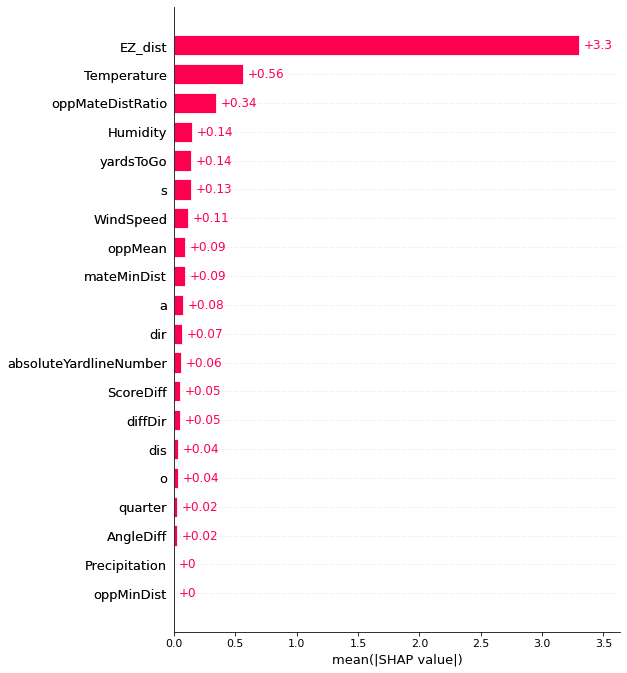

In [27]:
shap.plots.bar(shap_values, max_display=22)

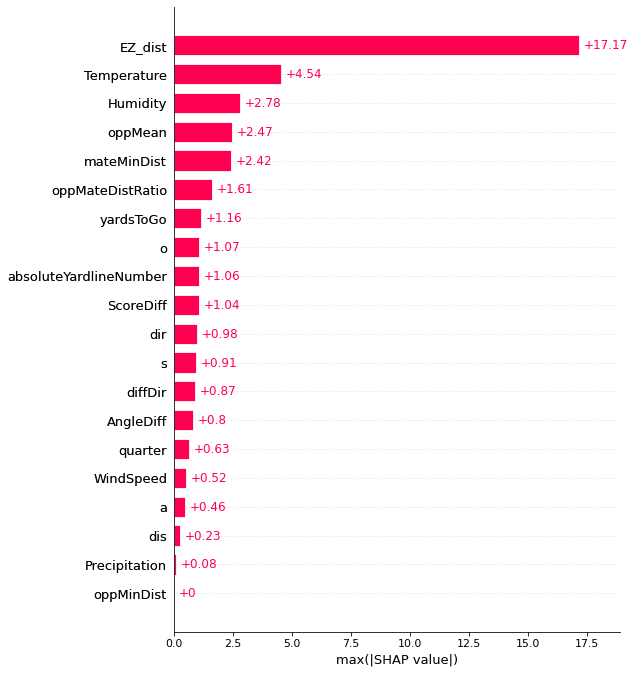

In [28]:
shap.plots.bar(shap_values.abs.max(0), max_display=23)

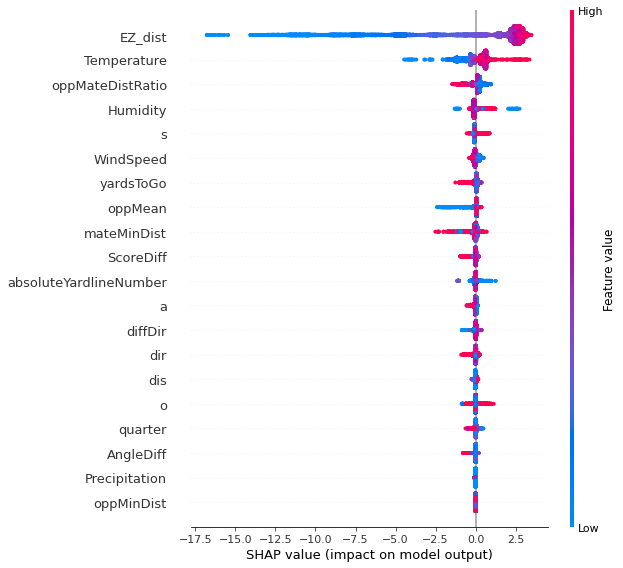

In [29]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

In [30]:
from sklearn.model_selection import cross_val_score
print("5 Fold CV Scores:", cross_val_score(model, X, y, cv=5, scoring = 'neg_root_mean_squared_error'))

5 Fold CV Scores: [-7.72761425 -7.76196605 -7.54078059 -7.8368674  -7.49316432]


In [31]:
y_pred = model.predict(X)
y_pred

array([47.527225, 38.535263, 46.597607, ..., 46.575066, 48.34993 ,
       35.12272 ], dtype=float32)

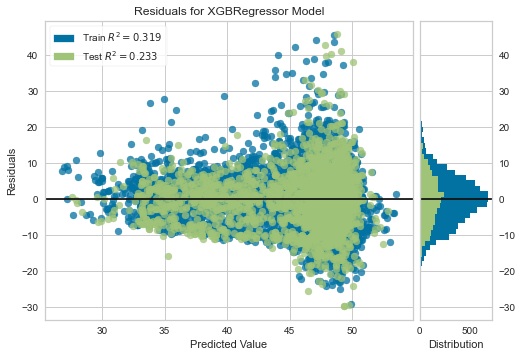

In [33]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

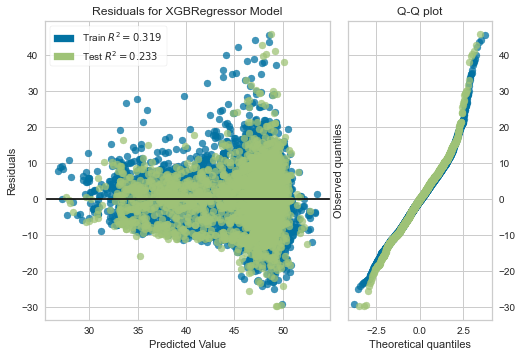

In [34]:
visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

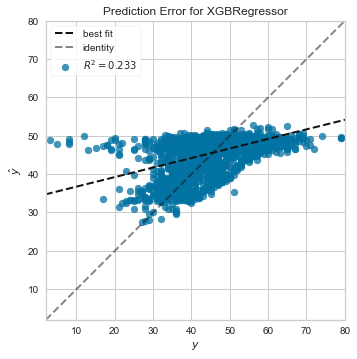

<AxesSubplot:title={'center':'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [35]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

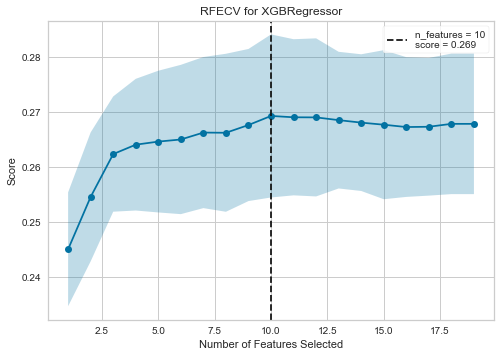

<AxesSubplot:title={'center':'RFECV for XGBRegressor'}, xlabel='Number of Features Selected', ylabel='Score'>

In [36]:
from yellowbrick.model_selection import RFECV

# Instantiate RFECV visualizer with a XGBoost
visualizer = RFECV(model)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

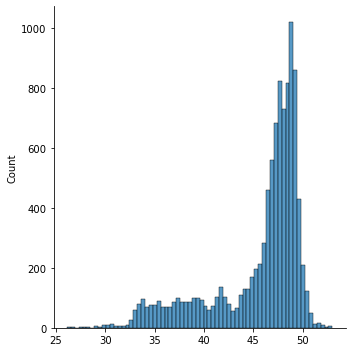

In [32]:
import seaborn as sns
sns.displot(y_pred);

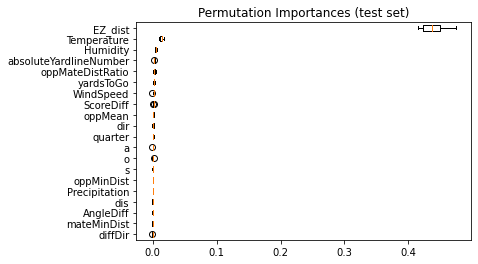

In [298]:
# from Sklearn documentation: https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py
from sklearn.inspection import permutation_importance
result = permutation_importance(model, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
plt.show()

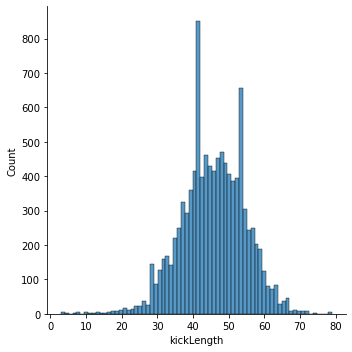

In [128]:
sns.displot(tests['kickLength']);

In [33]:
tests['KickLengthPred'] = y_pred
tests


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,s,a,dis,o,dir,event,frameId,gameId,playId,season,team,position,displayName,quarter,oppMean,oppMinDist,oppMateDistRatio,mateMinDist,diffDir,EZ_dist,yardsToGo,preSnapHomeScore,preSnapVisitorScore,absoluteYardlineNumber,Temperature,Humidity,Precipitation,WindSpeed,kickLength,AngleDiff,ScoreDiff,KickLengthPred
0,0.00,0.00,0.00,277.48,282.00,ball_snap,11,2018123000,892,2018,away,P,Britton Colquitt,1,14.179563,14.179563,0.179773,7.969473,198.35,74.831661,1,10,7,81,42.98,70.0,0.0,0.00,48.0,4.52,-3.0,47.527225
1,0.01,0.01,0.01,94.88,113.33,ball_snap,10,2018123000,1267,2018,away,P,Britton Colquitt,2,14.178159,14.178159,0.253723,8.966543,234.56,51.976592,7,17,7,62,42.98,70.0,0.0,0.00,48.0,18.45,-10.0,38.535263
2,0.07,0.02,0.01,117.67,238.69,ball_snap,11,2018123000,1976,2018,away,P,Britton Colquitt,2,13.839440,13.839440,0.137156,8.370263,53.75,96.862893,10,20,7,17,42.98,70.0,0.0,0.00,39.0,121.02,-13.0,46.597607
3,0.00,0.00,0.00,279.46,268.14,ball_snap,11,2018123000,2165,2018,home,P,Sam Koch,2,14.171708,14.171708,0.284991,9.313565,140.33,45.797246,17,20,7,52,42.98,70.0,0.0,0.00,36.0,11.32,13.0,34.731007
4,0.00,0.00,0.00,84.36,185.31,ball_snap,11,2018123000,2502,2018,home,P,Sam Koch,3,14.029544,14.029544,0.186149,8.785198,104.01,71.674660,14,20,7,42,42.98,70.0,0.0,0.00,53.0,100.95,13.0,47.240894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11636,2.78,1.86,0.28,264.90,122.69,punt,33,2020091401,2713,2020,home,P,Sam Martin,3,7.421220,7.421220,0.088991,6.834830,89.32,72.699685,14,7,7,38,71.06,27.0,0.0,5.59,53.0,142.21,0.0,50.097645
11637,1.94,1.54,0.20,92.95,113.49,punt,33,2020091401,3522,2020,away,P,Brett Kern,4,4.546405,4.546405,0.053640,4.024922,183.81,71.356141,5,14,13,40,71.06,27.0,0.0,5.59,50.0,20.54,-1.0,48.981274
11638,2.98,1.73,0.30,89.09,300.37,punt,32,2020091401,3655,2020,home,P,Sam Martin,4,5.945057,5.945057,0.085685,5.462023,162.18,57.624187,3,14,13,66,71.06,27.0,0.0,5.59,52.0,148.72,1.0,46.575066
11639,2.33,1.60,0.24,87.10,109.13,punt,33,2020091401,3741,2020,away,P,Brett Kern,4,5.801146,5.801146,0.052936,5.037460,152.24,96.903105,10,14,13,14,71.06,27.0,0.0,5.59,47.0,22.03,-1.0,48.349930


In [34]:
tests['kickLength'].describe()

count    10378.000000
mean        45.662459
std          8.975315
min          3.000000
25%         40.000000
50%         46.000000
75%         52.000000
max         79.000000
Name: kickLength, dtype: float64


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


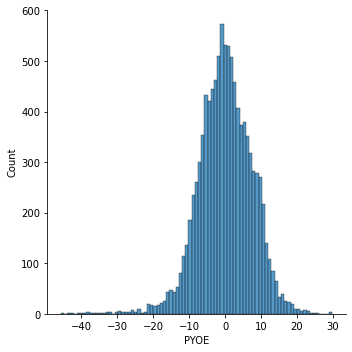

In [35]:
tests['PYOE'] = tests['kickLength'] - tests['KickLengthPred']
sns.displot(tests['PYOE']);

In [36]:
tests['PYOE'].describe()

count    10378.000000
mean         0.064922
std          7.515184
min        -45.735245
25%         -4.646497
50%          0.051384
75%          5.149381
max         29.785549
Name: PYOE, dtype: float64

In [37]:
tests.to_csv('pyoe.csv', index=False)

In [221]:
pred_length = tests.groupby(['displayName', 'gameId', 'playId', 'season'])['KYOE'].mean().rename('KYOE').reset_index()
pred_length.sort_values(by='KYOE', ascending=False)

,displayName,gameId,playId,season,KYOE
654,Britton Colquitt,2018102109,1838,2018,29.687492
4952,Tress Way,2019120101,3103,2019,29.128323
2649,Kevin Huber,2021010303,2844,2020,25.790703
32,A.J. Cole,2019122201,1330,2019,24.482361
3767,Pat O'Donnell,2019110305,122,2019,23.845255
...,...,...,...,...,...
3960,Rigoberto Sanchez,2019121600,266,2019,-39.909664
1716,J.K. Scott,2019110310,2274,2019,-40.798559
3373,Michael Dickson,2018100711,253,2018,-43.294054
364,Bradley Pinion,2019090811,130,2019,-43.902279


In [226]:
compare = pred_length.groupby(['displayName', 'season'])['KYOE'].sum().rename('PYOE').reset_index()
compare.sort_values(by='PYOE', ascending=False)

,displayName,season,PYOE
106,Tress Way,2019,254.656414
76,Michael Dickson,2020,237.649065
43,Jake Bailey,2020,226.517284
41,Jack Fox,2020,163.027199
3,Andy Lee,2018,156.245655
...,...,...,...
50,Johnny Townsend,2018,-127.610373
24,Chris Jones,2019,-133.163221
100,Sterling Hofrichter,2020,-152.451151
7,Braden Mann,2020,-163.957312


In [224]:
compare.to_csv('puntercumpyoe.csv', index=False)

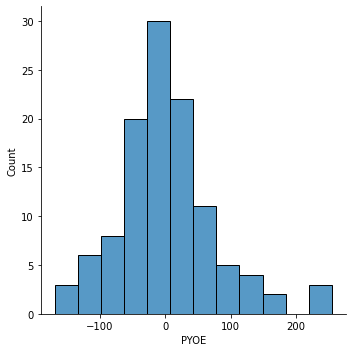

In [225]:
sns.displot(compare['PYOE']);

# PFF Scouting

In [228]:
pff = pd.read_csv('PFFScoutingData.csv')
pff

,gameId,playId,snapDetail,snapTime,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,kickContactType
0,2018090600,37,NaN,NaN,NaN,3.85,D,R,R,NaN,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,PHI 23; PHI 27,NaN,NaN
1,2018090600,366,OK,0.84,2.12,4.46,N,C,C,C,R,PHI 57,NaN,PHI 54,NaN,PHI 18; PHI 29,NaN,NaN,ATL 83; ATL 27; ATL 34; ATL 21,CC
2,2018090600,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHI 58,NaN,NaN
3,2018090600,677,NaN,NaN,NaN,4.06,D,R,R,C,C,ATL 83,ATL 22,ATL 27,8-0-2,NaN,NaN,ATL 17; ATL 22,NaN,NaN
4,2018090600,872,OK,0.84,2.00,4.35,N,C,L,NaN,NaN,NaN,NaN,NaN,NaN,PHI 18; PHI 29,ATL 85,ATL 37,ATL 83; ATL 34; ATL 21,BF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19974,2021010315,3683,NaN,NaN,NaN,4.19,D,L,L,NaN,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,SEA 28; SEA 99,NaN,NaN
19975,2021010315,3870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SF 20; SF 51,NaN,NaN
19976,2021010315,3886,NaN,NaN,NaN,3.88,D,L,L,NaN,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,SEA 28; SEA 99,NaN,NaN
19977,2021010315,4166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SEA 37; SEA 54,NaN,NaN


In [229]:
copy = tests.copy()
copy

,s,a,dis,o,dir,event,frameId,gameId,playId,season,team,position,displayName,quarter,oppMean,oppMinDist,oppMateDistRatio,mateMinDist,diffDir,EZ_dist,yardsToGo,preSnapHomeScore,preSnapVisitorScore,absoluteYardlineNumber,Temperature,Humidity,Precipitation,WindSpeed,kickLength,AngleDiff,ScoreDiff,KickLengthPred,KYOE
0,0.00,0.00,0.00,277.48,282.00,ball_snap,11,2018123000,892,2018,away,P,Britton Colquitt,1,14.179563,14.179563,0.179773,7.969473,198.35,74.831661,1,10,7,81,42.98,70.0,0.0,0.00,48.0,4.52,-3.0,47.527225,0.472775
1,0.01,0.01,0.01,94.88,113.33,ball_snap,10,2018123000,1267,2018,away,P,Britton Colquitt,2,14.178159,14.178159,0.253723,8.966543,234.56,51.976592,7,17,7,62,42.98,70.0,0.0,0.00,48.0,18.45,-10.0,38.535263,9.464737
2,0.07,0.02,0.01,117.67,238.69,ball_snap,11,2018123000,1976,2018,away,P,Britton Colquitt,2,13.839440,13.839440,0.137156,8.370263,53.75,96.862893,10,20,7,17,42.98,70.0,0.0,0.00,39.0,121.02,-13.0,46.597607,-7.597607
3,0.00,0.00,0.00,279.46,268.14,ball_snap,11,2018123000,2165,2018,home,P,Sam Koch,2,14.171708,14.171708,0.284991,9.313565,140.33,45.797246,17,20,7,52,42.98,70.0,0.0,0.00,36.0,11.32,13.0,34.731007,1.268993
4,0.00,0.00,0.00,84.36,185.31,ball_snap,11,2018123000,2502,2018,home,P,Sam Koch,3,14.029544,14.029544,0.186149,8.785198,104.01,71.674660,14,20,7,42,42.98,70.0,0.0,0.00,53.0,100.95,13.0,47.240894,5.759106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11636,2.78,1.86,0.28,264.90,122.69,punt,33,2020091401,2713,2020,home,P,Sam Martin,3,7.421220,7.421220,0.088991,6.834830,89.32,72.699685,14,7,7,38,71.06,27.0,0.0,5.59,53.0,142.21,0.0,50.097645,2.902355
11637,1.94,1.54,0.20,92.95,113.49,punt,33,2020091401,3522,2020,away,P,Brett Kern,4,4.546405,4.546405,0.053640,4.024922,183.81,71.356141,5,14,13,40,71.06,27.0,0.0,5.59,50.0,20.54,-1.0,48.981274,1.018726
11638,2.98,1.73,0.30,89.09,300.37,punt,32,2020091401,3655,2020,home,P,Sam Martin,4,5.945057,5.945057,0.085685,5.462023,162.18,57.624187,3,14,13,66,71.06,27.0,0.0,5.59,52.0,148.72,1.0,46.575066,5.424934
11639,2.33,1.60,0.24,87.10,109.13,punt,33,2020091401,3741,2020,away,P,Brett Kern,4,5.801146,5.801146,0.052936,5.037460,152.24,96.903105,10,14,13,14,71.06,27.0,0.0,5.59,47.0,22.03,-1.0,48.349930,-1.349930


In [230]:
hang = copy.merge(pff, how='inner', on=['gameId', 'playId'])
hang

,s,a,dis,o,dir,event,frameId,gameId,playId,season,team,position,displayName,quarter,oppMean,oppMinDist,oppMateDistRatio,mateMinDist,diffDir,EZ_dist,yardsToGo,preSnapHomeScore,preSnapVisitorScore,absoluteYardlineNumber,Temperature,Humidity,Precipitation,WindSpeed,kickLength,AngleDiff,ScoreDiff,KickLengthPred,KYOE,snapDetail,snapTime,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,kickContactType
0,0.00,0.00,0.00,277.48,282.00,ball_snap,11,2018123000,892,2018,away,P,Britton Colquitt,1,14.179563,14.179563,0.179773,7.969473,198.35,74.831661,1,10,7,81,42.98,70.0,0.0,0.00,48.0,4.52,-3.0,47.527225,0.472775,OK,0.86,2.07,4.38,N,R,R,NaN,NaN,NaN,NaN,NaN,NaN,CLE 27; CLE 31,NaN,NaN,BAL 28; BAL 26,CC
1,2.02,1.10,0.21,275.17,286.31,punt,31,2018123000,892,2018,away,P,Britton Colquitt,1,6.388239,6.388239,0.075790,5.791692,204.89,72.753772,1,10,7,81,42.98,70.0,0.0,0.00,48.0,11.14,-3.0,47.539143,0.460857,OK,0.86,2.07,4.38,N,R,R,NaN,NaN,NaN,NaN,NaN,NaN,CLE 27; CLE 31,NaN,NaN,BAL 28; BAL 26,CC
2,0.01,0.01,0.01,94.88,113.33,ball_snap,10,2018123000,1267,2018,away,P,Britton Colquitt,2,14.178159,14.178159,0.253723,8.966543,234.56,51.976592,7,17,7,62,42.98,70.0,0.0,0.00,48.0,18.45,-10.0,38.535263,9.464737,OK,0.84,1.98,4.12,A,C,C,NaN,NaN,NaN,NaN,NaN,NaN,CLE 31; CLE 27,BAL 10; BAL 36; BAL 40; BAL 41; BAL 49; BAL 54...,NaN,BAL 28; BAL 26,BF
3,2.01,1.21,0.21,91.13,115.55,punt,30,2018123000,1267,2018,away,P,Britton Colquitt,2,6.567930,6.567930,0.106202,6.054428,204.34,49.961358,7,17,7,62,42.98,70.0,0.0,0.00,48.0,24.42,-10.0,38.862957,9.137043,OK,0.84,1.98,4.12,A,C,C,NaN,NaN,NaN,NaN,NaN,NaN,CLE 31; CLE 27,BAL 10; BAL 36; BAL 40; BAL 41; BAL 49; BAL 54...,NaN,BAL 28; BAL 26,BF
4,0.07,0.02,0.01,117.67,238.69,ball_snap,11,2018123000,1976,2018,away,P,Britton Colquitt,2,13.839440,13.839440,0.137156,8.370263,53.75,96.862893,10,20,7,17,42.98,70.0,0.0,0.00,39.0,121.02,-13.0,46.597607,-7.597607,OK,0.87,2.16,4.47,N,C,C,NaN,NaN,NaN,NaN,NaN,NaN,CLE 31; CLE 27,NaN,NaN,BAL 28; BAL 36; BAL 26; BAL 41,CC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10373,3.04,0.66,0.30,283.08,283.05,punt,23,2020111504,3065,2020,away,P,Cameron Johnston,3,6.315354,6.315354,0.074570,5.831672,161.64,72.754879,11,21,17,81,55.94,60.0,0.0,18.64,56.0,0.03,-4.0,48.926327,7.073673,L,0.96,2.19,4.88,N,C,C,R,R,NaN,NaN,PHI 36,NaN,PHI 42; PHI 36,NaN,NaN,NYG 20; NYG 45; NYG 27; NYG 28,CC
10374,1.88,1.49,0.20,101.20,126.65,punt,17,2020102510,424,2020,home,P,Jake Bailey,1,6.823562,6.823562,0.096097,7.203124,134.67,58.712957,1,0,7,54,49.82,60.0,0.0,6.84,44.0,25.45,-7.0,45.273632,-1.273632,OK,0.84,2.27,4.88,N,R,R,NaN,NaN,NaN,NaN,NaN,NaN,NE 29; NE 18,NaN,NaN,SF 40; SF 27,CC
10375,2.10,1.08,0.21,93.25,92.94,punt,11,2020101812,617,2020,home,P,Jake Bailey,1,5.992704,5.992704,0.109674,5.377667,179.66,42.593259,11,0,6,69,58.82,45.0,0.0,8.08,32.0,0.31,-6.0,34.534378,-2.534378,OK,0.77,2.03,4.73,A,C,C,NaN,NaN,NaN,NaN,NaN,NaN,NE 18; NE 29,NaN,NaN,DEN 20; DEN 27,CC
10376,2.18,1.39,0.22,256.30,279.18,punt,21,2020100100,916,2020,home,P,Braden Mann,2,2.802320,2.802320,0.041736,2.839331,237.34,51.680926,19,7,3,61,66.02,54.0,0.0,8.08,51.0,22.88,4.0,35.310974,15.689026,OK,0.82,1.98,4.30,A,L,L,NaN,NaN,NaN,NaN,NaN,NaN,NYJ 29; NYJ 38,DEN 36,NaN,DEN 20; DEN 41,BF


In [234]:
hang['snapDetail'].value_counts()

OK    9576
L      315
H      234
>      129
<      124
Name: snapDetail, dtype: int64

In [231]:
hangtime = hang.groupby(['displayName', 'season'])['hangTime'].mean().rename('hangTime').reset_index()
hangtime.sort_values(by='hangTime', ascending=False)

,displayName,season,hangTime
67,Matt Bosher,2019,4.614000
40,J.K. Scott,2020,4.579302
30,Corey Bojorquez,2019,4.561159
37,Hunter Niswander,2020,4.542593
41,Jack Fox,2020,4.541964
...,...,...,...
92,Ryan Allen,2020,3.790714
28,Colton Schmidt,2018,3.698750
2,Aldrick Rosas,2020,3.673333
44,Jake Elliott,2020,3.580000


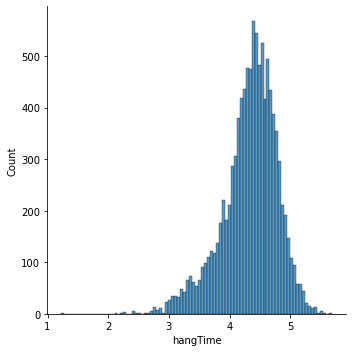

In [233]:
sns.displot(hang['hangTime']);

In [232]:
hangtime.to_csv('hangtime.csv', index=False)

# Analyze Player's Punt

In [246]:
jake = tests[tests['displayName']=='Jake Bailey']
jake = jake[jake['season']==2020]
jake

,s,a,dis,o,dir,event,frameId,gameId,playId,season,team,position,displayName,quarter,oppMean,oppMinDist,oppMateDistRatio,mateMinDist,diffDir,EZ_dist,yardsToGo,preSnapHomeScore,preSnapVisitorScore,absoluteYardlineNumber,Temperature,Humidity,Precipitation,WindSpeed,kickLength,AngleDiff,ScoreDiff,KickLengthPred,KYOE
4149,0.00,0.00,0.00,96.36,34.43,ball_snap,11,2021010307,671,2020,home,P,Jake Bailey,1,14.654324,14.654324,0.187484,9.126631,172.87,74.966442,5,7,0,40,33.80,77.0,0.0,4.35,47.0,61.93,7.0,47.636322,-0.636322
4151,0.37,0.15,0.04,268.90,263.41,ball_snap,11,2021010307,1026,2020,home,P,Jake Bailey,2,14.968293,14.968293,0.274690,8.918660,160.91,51.930430,4,7,0,57,33.80,77.0,0.0,4.35,37.0,5.49,7.0,38.724789,-1.724789
4153,0.03,0.04,0.01,269.95,257.10,ball_snap,11,2021010307,1478,2020,home,P,Jake Bailey,2,14.860989,14.860989,0.286959,8.441102,143.19,49.115623,19,7,0,55,33.80,77.0,0.0,4.35,45.0,12.85,7.0,36.902206,8.097794
4154,0.00,0.00,0.00,269.40,230.86,ball_snap,11,2021010307,2033,2020,home,P,Jake Bailey,2,14.737449,14.737449,0.271041,8.875641,120.67,51.058859,10,7,7,57,33.80,77.0,0.0,4.35,38.0,38.54,0.0,38.480438,-0.480438
4155,0.00,0.00,0.00,99.54,63.39,ball_snap,11,2021010307,2460,2020,home,P,Jake Bailey,3,14.677118,14.677118,0.202918,8.699201,89.52,69.489442,4,7,14,45,33.80,77.0,0.0,4.35,65.0,36.15,-7.0,47.241997,17.758003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11366,2.17,1.01,0.22,301.42,287.60,punt,33,2020092704,440,2020,home,P,Jake Bailey,1,4.926469,4.926469,0.062930,5.073588,180.76,65.676195,9,0,0,74,73.94,77.0,0.0,6.21,54.0,13.82,0.0,48.706852,5.293148
11526,2.09,1.06,0.21,272.79,272.22,punt,32,2020092013,1155,2020,away,P,Jake Bailey,2,6.946222,6.946222,0.073241,6.286183,175.62,83.260024,1,7,14,92,69.26,55.0,0.0,5.59,57.0,0.57,7.0,49.502956,7.497044
11529,1.64,1.93,0.17,273.73,272.62,punt,33,2020092013,3302,2020,away,P,Jake Bailey,4,6.351323,6.351323,0.075101,5.822783,210.04,72.098079,8,28,23,81,69.26,55.0,0.0,5.59,56.0,1.11,-5.0,49.593414,6.406586
11574,2.34,0.75,0.24,279.81,274.06,punt,32,2020091307,328,2020,home,P,Jake Bailey,1,6.261414,6.261414,0.096995,5.681487,187.74,52.485054,9,0,0,61,70.52,61.0,0.0,8.08,40.0,5.75,0.0,41.631123,-1.631123


In [317]:
jake['KYOE'].describe()

count    90.000000
mean      5.076029
std       7.080050
min     -13.246876
25%      -0.013893
50%       5.243292
75%       9.477691
max      23.340084
Name: KYOE, dtype: float64

In [318]:
matt['KYOE'].describe()

count    39.000000
mean     -4.756056
std       9.492039
min     -36.100052
25%      -8.648453
50%      -3.775005
75%       0.509066
max      10.660412
Name: KYOE, dtype: float64

In [247]:
jake['kickLength'].describe()

count    90.000000
mean     49.955556
std      10.182504
min      25.000000
25%      41.250000
50%      51.000000
75%      57.000000
max      71.000000
Name: kickLength, dtype: float64

In [248]:
tests['KickLengthPred'].describe()

count    10378.000000
mean        45.597530
std          4.614342
min         26.132591
25%         44.355233
50%         47.432173
75%         48.724121
max         53.003246
Name: KickLengthPred, dtype: float64

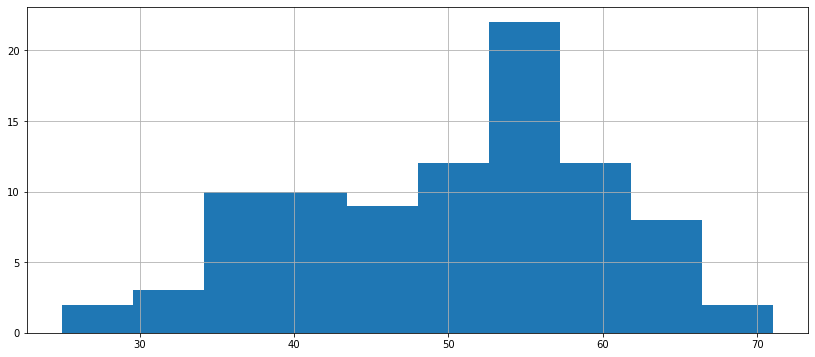

In [249]:
jake['kickLength'].hist(bins=10, figsize=[14,6]);

In [250]:
from scipy.stats import mannwhitneyu
# compare samples
stat, p = mannwhitneyu(jake['kickLength'], jake['KickLengthPred'])
print('Statistics=%.3f, p=%.6f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=2583.000, p=0.000014
Different distribution (reject H0)


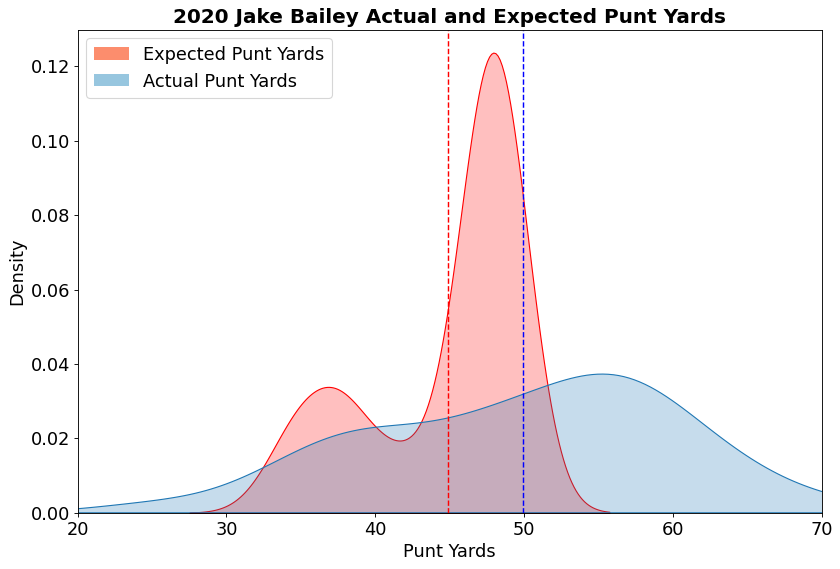

In [296]:
import matplotlib.patches as  mpatches
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

figure(figsize=(12, 8), dpi=80)
ax = sns.kdeplot(data=jake['KickLengthPred'], shade=True, color="red", cmap="Reds")
ax = sns.kdeplot(data=jake['kickLength'], shade=True, cmap="Blues")
handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Expected Punt Yards"),
           mpatches.Patch(facecolor=plt.cm.Blues(100), label="Actual Punt Yards")]
plt.legend(handles=handles, loc=2, prop={'size': 16})
ax = plt.title("2020 Jake Bailey Actual and Expected Punt Yards", fontsize=18, fontweight='bold')
plt.axvline(x=jake.kickLength.mean(),
            color='blue',
           ls='--', 
            lw=1.3)
plt.axvline(x=jake.KickLengthPred.mean(),
            color='red',
           ls='--', 
            lw=1.3)
ax = plt.xlabel('Punt Yards', fontsize=16)
ax = plt.ylabel('Density', fontsize=16)
ax = plt.xticks(fontsize=16)
ax = plt.yticks(fontsize=16)


ax = plt.xlim((20, 70))

#plt.annotate('Mann-Whitney U', xy= (57.8, 0.11), fontweight='bold');
#plt.annotate('Statistics=2583, p=0.000014', xy= (57.8, 0.105));
#plt.annotate('Different distribution (reject H0)', xy= (57.8, 0.10));
plt.savefig('expectedvsactual.png')

In [254]:
matt = tests[tests['displayName']=='Matt Darr']
matt = matt[matt['season']==2018]
matt

,s,a,dis,o,dir,event,frameId,gameId,playId,season,team,position,displayName,quarter,oppMean,oppMinDist,oppMateDistRatio,mateMinDist,diffDir,EZ_dist,yardsToGo,preSnapHomeScore,preSnapVisitorScore,absoluteYardlineNumber,Temperature,Humidity,Precipitation,WindSpeed,kickLength,AngleDiff,ScoreDiff,KickLengthPred,KYOE
9,0.01,0.01,0.00,205.36,151.89,ball_snap,11,2018123001,1326,2018,home,P,Matt Darr,2,15.088731,15.088731,0.174284,9.322580,177.51,84.130232,15,14,0,89,30.92,89.0,0.016,5.84,35.0,53.47,14.0,45.828938,-10.828938
11,0.00,0.00,0.00,249.07,195.87,ball_snap,11,2018123001,1538,2018,home,P,Matt Darr,2,14.929869,14.929869,0.169957,9.392577,11.58,84.955005,1,14,0,90,30.92,89.0,0.016,5.84,32.0,53.20,14.0,45.787525,-13.787525
13,0.00,0.00,0.00,79.99,129.87,ball_snap,11,2018123001,3338,2018,home,P,Matt Darr,4,15.062244,15.062244,0.193316,9.591335,132.89,75.557571,5,28,17,40,30.92,89.0,0.016,5.84,44.0,49.88,11.0,46.047592,-2.047592
203,0.00,0.00,0.00,67.79,149.53,ball_snap,11,2018122308,129,2018,away,P,Matt Darr,1,14.785645,14.785645,0.188789,8.940431,40.19,75.013402,6,0,0,40,41.00,36.0,0.000,13.86,47.0,81.74,0.0,46.676498,0.323502
205,0.00,0.00,0.00,82.34,213.76,ball_snap,11,2018122308,324,2018,away,P,Matt Darr,1,14.572841,14.572841,0.165422,8.619292,45.47,84.812882,5,0,0,30,41.00,36.0,0.000,13.86,35.0,131.42,0.0,46.827057,-11.827057
206,0.00,0.00,0.00,64.52,149.24,ball_snap,11,2018122308,598,2018,away,P,Matt Darr,1,14.223800,14.223800,0.168759,8.897264,144.54,80.983095,8,7,0,34,41.00,36.0,0.000,13.86,55.0,84.72,-7.0,46.931126,8.068874
208,0.00,0.00,0.00,267.74,253.93,ball_snap,11,2018122308,1216,2018,away,P,Matt Darr,2,15.492905,15.492905,0.209014,10.278604,216.25,71.688936,3,7,0,77,41.00,36.0,0.000,13.86,45.0,13.81,-7.0,46.538647,-1.538647
212,0.00,0.00,0.00,90.05,62.63,ball_snap,11,2018122308,3289,2018,away,P,Matt Darr,4,14.993442,14.993442,0.154737,9.997200,179.17,94.094115,7,21,6,21,41.00,36.0,0.000,13.86,38.0,27.42,-15.0,46.483227,-8.483227
213,0.00,0.00,0.01,39.33,359.70,ball_snap,11,2018122308,3571,2018,away,P,Matt Darr,4,15.199184,15.199184,0.179855,9.525314,81.92,82.107160,12,24,6,33,41.00,36.0,0.000,13.86,10.0,39.63,-18.0,46.100052,-36.100052
301,0.00,0.00,0.00,266.24,307.15,ball_snap,11,2018121602,367,2018,home,P,Matt Darr,1,15.326699,15.326699,0.356290,9.679752,192.63,40.840374,18,0,0,46,37.94,82.0,0.000,8.08,36.0,40.91,0.0,29.402466,6.597534


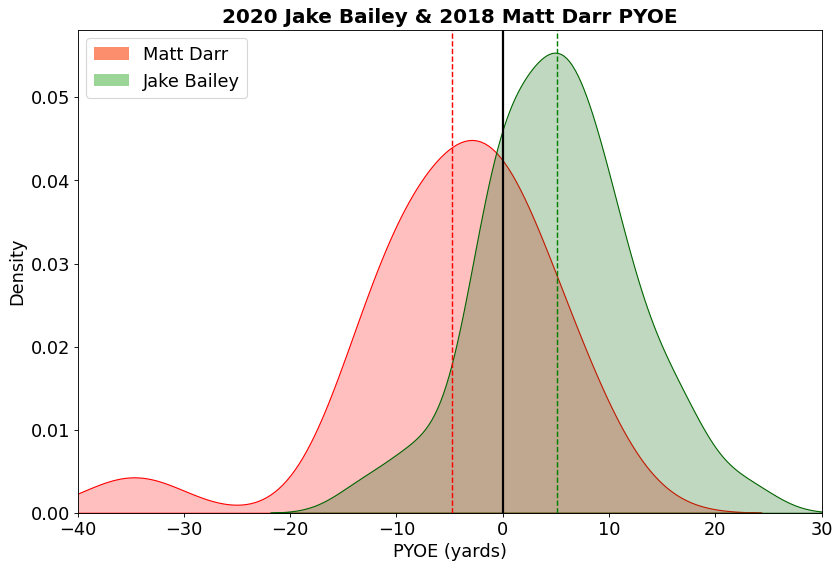

In [319]:
import matplotlib.patches as  mpatches
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

figure(figsize=(12, 8), dpi=80)
ax = sns.kdeplot(data=matt['KYOE'], shade=True, color="red", cmap="Reds")
ax = sns.kdeplot(data=jake['KYOE'], shade=True, cmap="Greens", color='darkgreen')
handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Matt Darr"),
           mpatches.Patch(facecolor=plt.cm.Greens(100), label="Jake Bailey")]
plt.legend(handles=handles, loc=2, prop={'size': 16})
ax = plt.title("2020 Jake Bailey & 2018 Matt Darr PYOE", fontsize=18, fontweight='bold')
plt.axvline(x=jake.KYOE.mean(),
            color='green',
           ls='--', 
            lw=1.3)
plt.axvline(x=matt.KYOE.mean(),
            color='red',
           ls='--', 
            lw=1.3)
plt.axvline(x=0,
            color='black',
           ls='-', 
            lw=2)

ax = plt.xlim((-40, 30))
ax = plt.xticks(fontsize=16)
ax = plt.yticks(fontsize=16)
ax = plt.xlabel('PYOE (yards)', fontsize=16)
ax = plt.ylabel('Density', fontsize=16)
plt.savefig('pyoe.png')

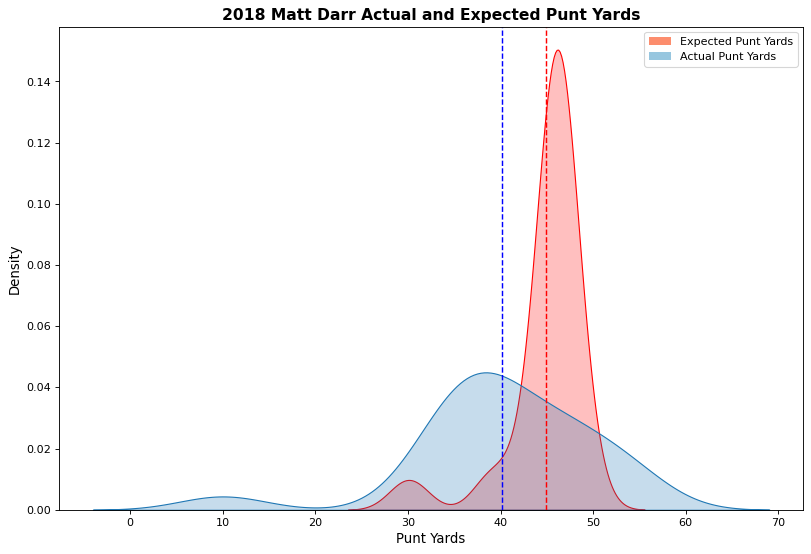

In [257]:
figure(figsize=(12, 8), dpi=80)
ax = sns.kdeplot(data=matt['KickLengthPred'], shade=True, color="red", cmap="Reds")
ax = sns.kdeplot(data=matt['kickLength'], shade=True, cmap="Blues")
handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Expected Punt Yards"),
           mpatches.Patch(facecolor=plt.cm.Blues(100), label="Actual Punt Yards")]
plt.legend(handles=handles)
plt.axvline(x=matt.kickLength.mean(),
            color='blue',
           ls='--', 
            lw=1.3)
plt.axvline(x=matt.KickLengthPred.mean(),
            color='red',
           ls='--', 
            lw=1.3)
ax = plt.title("2018 Matt Darr Actual and Expected Punt Yards", fontsize=14, fontweight='bold')
ax = plt.xlabel('Punt Yards', fontsize=12)
ax = plt.ylabel('Density', fontsize=12)

In [258]:
andy = tests[tests['displayName']=='Andy Lee']
andy = andy[andy['season']==2018]
andy

,s,a,dis,o,dir,event,frameId,gameId,playId,season,team,position,displayName,quarter,oppMean,oppMinDist,oppMateDistRatio,mateMinDist,diffDir,EZ_dist,yardsToGo,preSnapHomeScore,preSnapVisitorScore,absoluteYardlineNumber,Temperature,Humidity,Precipitation,WindSpeed,kickLength,AngleDiff,ScoreDiff,KickLengthPred,KYOE
226,0.01,0.01,0.01,112.35,78.56,ball_snap,11,2018122311,798,2018,home,P,Andy Lee,1,14.790825,14.790825,0.191120,9.301747,24.59,74.142658,5,3,7,40,69.80,25.0,0.0,0.00,54.0,33.79,-4.0,49.290024,4.709976
227,0.00,0.00,0.00,269.99,253.06,ball_snap,11,2018122311,2312,2018,home,P,Andy Lee,3,15.135604,15.135604,0.290009,9.353727,160.87,49.685486,9,9,21,55,69.80,25.0,0.0,0.00,34.0,16.93,-12.0,36.945641,-2.945641
228,0.00,0.00,0.00,264.09,226.56,ball_snap,11,2018122311,2785,2018,home,P,Andy Lee,3,14.655760,14.655760,0.179157,8.961362,183.44,78.450820,9,9,24,84,69.80,25.0,0.0,0.00,56.0,37.53,-15.0,49.408768,6.591232
230,0.00,0.00,0.01,121.00,31.56,ball_snap,11,2018122311,3332,2018,home,P,Andy Lee,4,14.493123,14.493123,0.242462,9.209696,242.67,55.937069,18,9,24,58,69.80,25.0,0.0,0.00,47.0,89.44,-15.0,41.962032,5.037968
231,0.03,0.03,0.01,122.27,113.02,ball_snap,11,2018122311,3616,2018,home,P,Andy Lee,4,14.641776,14.641776,0.171848,8.972458,198.79,82.156646,13,9,31,32,69.80,25.0,0.0,0.00,55.0,9.25,-22.0,49.507244,5.492756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7892,2.66,1.38,0.27,62.40,105.54,punt,31,2018090909,501,2018,home,P,Andy Lee,1,6.119028,6.119028,0.083529,5.708187,159.50,60.627918,1,0,0,50,100.22,25.0,0.0,6.96,60.0,43.14,0.0,50.261883,9.738117
7893,3.03,0.59,0.30,255.92,264.25,punt,34,2018090909,918,2018,home,P,Andy Lee,2,7.469170,7.469170,0.087757,7.158561,208.87,73.790132,7,0,7,82,100.22,25.0,0.0,6.96,57.0,8.33,-7.0,53.003246,3.996754
7894,2.92,0.73,0.29,241.49,268.94,punt,33,2018090909,1416,2018,home,P,Andy Lee,2,6.194554,6.194554,0.072072,6.260032,132.23,73.961410,8,0,14,83,100.22,25.0,0.0,6.96,56.0,27.45,-14.0,52.784668,3.215332
7895,2.35,1.10,0.24,244.65,257.42,punt,32,2018090909,1990,2018,home,P,Andy Lee,3,7.783990,7.783990,0.146296,7.667418,166.68,43.155765,3,0,21,51,100.22,25.0,0.0,6.96,33.0,12.77,-21.0,34.183060,-1.183060


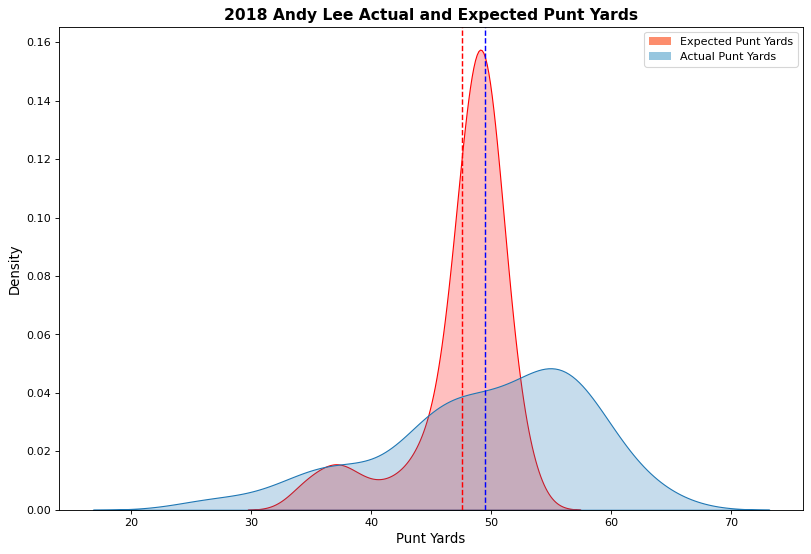

In [259]:
figure(figsize=(12, 8), dpi=80)
ax = sns.kdeplot(data=andy['KickLengthPred'], shade=True, color="red", cmap="Reds")
ax = sns.kdeplot(data=andy['kickLength'], shade=True, cmap="Blues")
handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Expected Punt Yards"),
           mpatches.Patch(facecolor=plt.cm.Blues(100), label="Actual Punt Yards")]
plt.legend(handles=handles)
plt.axvline(x=andy.kickLength.mean(),
            color='blue',
           ls='--', 
            lw=1.3)
plt.axvline(x=andy.KickLengthPred.mean(),
            color='red',
           ls='--', 
            lw=1.3)
ax = plt.title("2018 Andy Lee Actual and Expected Punt Yards", fontsize=14, fontweight='bold')
ax = plt.xlabel('Punt Yards', fontsize=12)
ax = plt.ylabel('Density', fontsize=12)

In [261]:
mitch = tests[tests['displayName']=='Mitch Wishnowsky']
mitch = mitch[mitch['season']==2019]
mitch

,s,a,dis,o,dir,event,frameId,gameId,playId,season,team,position,displayName,quarter,oppMean,oppMinDist,oppMateDistRatio,mateMinDist,diffDir,EZ_dist,yardsToGo,preSnapHomeScore,preSnapVisitorScore,absoluteYardlineNumber,Temperature,Humidity,Precipitation,WindSpeed,kickLength,AngleDiff,ScoreDiff,KickLengthPred,KYOE
2564,0.00,0.00,0.00,94.30,103.37,ball_snap,11,2019120806,890,2019,away,P,Mitch Wishnowsky,1,15.467256,15.467256,0.165745,9.864913,156.62,91.167644,21,13,7,24,66.20,64.0,0.000,0.00,40.0,9.07,-6.0,49.390324,-9.390324
2566,0.00,0.00,0.00,99.76,55.74,ball_snap,11,2019120806,2557,2019,away,P,Mitch Wishnowsky,3,15.454892,15.454892,0.200995,10.567900,200.04,74.116452,4,30,28,41,66.20,64.0,0.000,0.00,49.0,44.02,-2.0,48.754211,0.245789
2567,0.00,0.00,0.00,95.99,55.62,ball_snap,11,2019120806,3061,2019,away,P,Mitch Wishnowsky,3,15.360212,15.360212,0.169445,9.491649,226.57,88.551125,18,33,35,27,66.20,64.0,0.000,0.00,45.0,40.37,2.0,49.361080,-4.361080
2647,0.00,0.00,0.00,303.23,338.43,ball_snap,11,2019120100,719,2019,away,P,Mitch Wishnowsky,1,15.314598,15.314598,0.222987,9.842159,321.01,65.674036,1,7,7,71,39.02,93.0,0.150,16.09,45.0,35.20,0.0,47.309792,-2.309792
2649,0.00,0.00,0.00,93.69,136.33,ball_snap,11,2019120100,2926,2019,away,P,Mitch Wishnowsky,4,15.400393,15.400393,0.204381,10.226695,137.43,73.331915,10,17,17,42,39.02,93.0,0.150,16.09,45.0,42.64,0.0,46.515781,-1.515781
3082,0.00,0.00,0.00,92.43,109.99,ball_snap,11,2019103100,386,2019,away,P,Mitch Wishnowsky,1,15.441091,15.441091,0.200091,10.275335,158.52,75.139655,3,7,0,40,66.20,13.0,0.000,5.84,47.0,17.56,-7.0,49.498459,-2.498459
3084,0.00,0.00,0.00,92.84,32.92,ball_snap,11,2019103100,643,2019,away,P,Mitch Wishnowsky,1,15.510477,15.510477,0.232100,10.207154,249.67,64.676708,2,7,0,51,66.20,13.0,0.000,5.84,49.0,59.92,-7.0,48.150234,0.849766
3088,0.00,0.00,0.00,95.05,127.21,ball_snap,11,2019103100,2355,2019,away,P,Mitch Wishnowsky,3,15.193426,15.193426,0.209493,9.824892,151.21,69.912839,16,7,21,45,66.20,13.0,0.000,5.84,47.0,32.16,14.0,49.036816,-2.036816
3090,0.00,0.00,0.00,98.61,86.66,ball_snap,11,2019103100,3252,2019,away,P,Mitch Wishnowsky,3,15.231313,15.231313,0.292930,10.291200,161.76,49.763011,9,14,28,65,66.20,13.0,0.000,5.84,38.0,11.95,14.0,37.085918,0.914082
3091,0.05,0.05,0.02,278.51,292.42,ball_snap,11,2019103100,3823,2019,away,P,Mitch Wishnowsky,4,15.514306,15.514306,0.229992,9.951407,209.30,65.033809,3,17,28,70,66.20,13.0,0.000,5.84,50.0,13.91,11.0,48.433315,1.566685


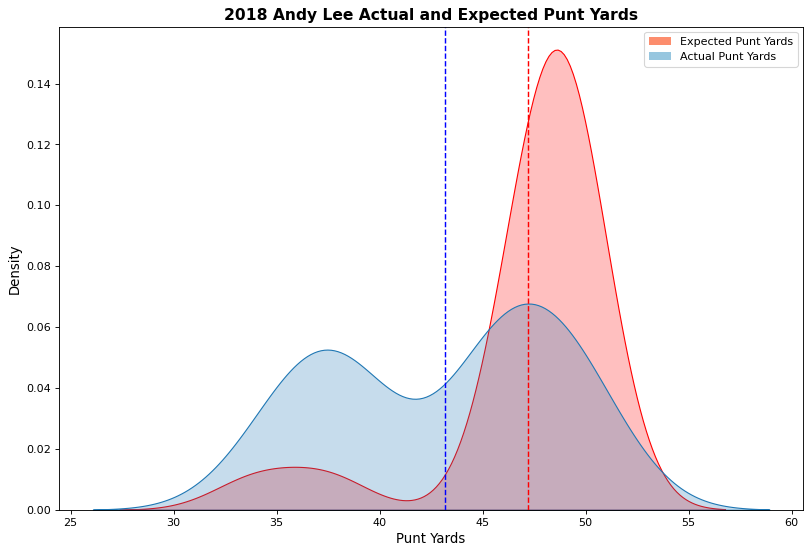

In [262]:
figure(figsize=(12, 8), dpi=80)
ax = sns.kdeplot(data=mitch['KickLengthPred'], shade=True, color="red", cmap="Reds")
ax = sns.kdeplot(data=mitch['kickLength'], shade=True, cmap="Blues")
handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Expected Punt Yards"),
           mpatches.Patch(facecolor=plt.cm.Blues(100), label="Actual Punt Yards")]
plt.legend(handles=handles)
plt.axvline(x=mitch.kickLength.mean(),
            color='blue',
           ls='--', 
            lw=1.3)
plt.axvline(x=mitch.KickLengthPred.mean(),
            color='red',
           ls='--', 
            lw=1.3)
ax = plt.title("2018 Andy Lee Actual and Expected Punt Yards", fontsize=14, fontweight='bold')
ax = plt.xlabel('Punt Yards', fontsize=12)
ax = plt.ylabel('Density', fontsize=12)

In [263]:
brett = tests[tests['displayName']=='Brett Kern']
brett = brett[brett['season']==2020]
brett

,s,a,dis,o,dir,event,frameId,gameId,playId,season,team,position,displayName,quarter,oppMean,oppMinDist,oppMateDistRatio,mateMinDist,diffDir,EZ_dist,yardsToGo,preSnapHomeScore,preSnapVisitorScore,absoluteYardlineNumber,Temperature,Humidity,Precipitation,WindSpeed,kickLength,AngleDiff,ScoreDiff,KickLengthPred,KYOE
4176,0.00,0.00,0.00,116.03,235.36,ball_snap,11,2021010312,347,2020,away,P,Brett Kern,1,14.053928,14.053928,0.205845,8.350742,63.68,64.108104,12,0,0,50,68.18,37.0,0.000,9.32,46.0,119.33,0.0,47.449520,-1.449520
4320,0.19,0.10,0.04,267.35,332.96,ball_snap,11,2020122713,474,2020,away,P,Brett Kern,1,15.186102,15.186102,0.381265,9.207790,258.77,36.356953,7,6,0,42,27.14,85.0,0.039,14.91,32.0,65.61,-6.0,27.975559,4.024441
4321,0.03,0.04,0.01,92.67,76.45,ball_snap,11,2020122713,1117,2020,away,P,Brett Kern,2,13.956593,13.956593,0.149550,8.806566,189.65,89.743297,27,19,0,24,27.14,85.0,0.039,14.91,41.0,16.22,-19.0,46.905636,-5.905636
4322,0.06,0.06,0.02,92.03,116.91,ball_snap,11,2020122713,2172,2020,away,P,Brett Kern,3,14.600658,14.600658,0.197441,9.270496,56.11,70.632525,7,26,14,43,27.14,85.0,0.039,14.91,41.0,24.88,-12.0,46.944366,-5.944366
4367,0.00,0.00,0.00,266.80,259.47,ball_snap,11,2020122004,2567,2020,home,P,Brett Kern,3,13.751574,13.751574,0.219031,8.560333,148.67,58.944407,10,24,15,65,46.40,92.0,0.000,6.21,47.0,7.33,9.0,45.241493,1.758507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11501,2.18,1.41,0.22,256.83,279.50,punt,32,2020092009,3650,2020,home,P,Brett Kern,4,5.613840,5.613840,0.097870,5.414647,160.09,43.240310,8,30,30,52,71.24,63.0,0.000,5.59,31.0,22.67,0.0,34.621540,-3.621540
11632,2.58,0.98,0.26,286.55,265.15,punt,32,2020091401,247,2020,away,P,Brett Kern,1,4.730803,4.730803,0.070573,4.240778,172.67,53.325502,5,0,0,62,71.06,27.0,0.000,5.59,41.0,21.40,0.0,42.010796,-1.010796
11634,2.24,1.46,0.23,72.76,80.02,punt,32,2020091401,1008,2020,away,P,Brett Kern,2,6.736980,6.736980,0.082674,5.842576,187.22,70.598358,4,7,0,41,71.06,27.0,0.000,5.59,66.0,7.26,-7.0,49.377270,16.622730
11637,1.94,1.54,0.20,92.95,113.49,punt,33,2020091401,3522,2020,away,P,Brett Kern,4,4.546405,4.546405,0.053640,4.024922,183.81,71.356141,5,14,13,40,71.06,27.0,0.000,5.59,50.0,20.54,-1.0,48.981274,1.018726


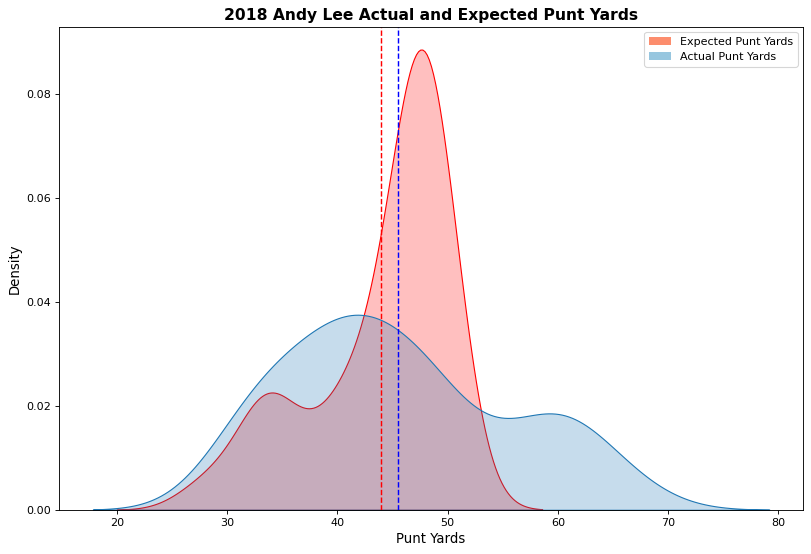

In [264]:
figure(figsize=(12, 8), dpi=80)
ax = sns.kdeplot(data=brett['KickLengthPred'], shade=True, color="red", cmap="Reds")
ax = sns.kdeplot(data=brett['kickLength'], shade=True, cmap="Blues")
handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Expected Punt Yards"),
           mpatches.Patch(facecolor=plt.cm.Blues(100), label="Actual Punt Yards")]
plt.legend(handles=handles)
plt.axvline(x=brett.kickLength.mean(),
            color='blue',
           ls='--', 
            lw=1.3)
plt.axvline(x=brett.KickLengthPred.mean(),
            color='red',
           ls='--', 
            lw=1.3)
ax = plt.title("2018 Andy Lee Actual and Expected Punt Yards", fontsize=14, fontweight='bold')
ax = plt.xlabel('Punt Yards', fontsize=12)
ax = plt.ylabel('Density', fontsize=12)

In [265]:
corey = tests[tests['displayName']=='Corey Bojorquez']
corey = corey[corey['season']==2019]
corey

,s,a,dis,o,dir,event,frameId,gameId,playId,season,team,position,displayName,quarter,oppMean,oppMinDist,oppMateDistRatio,mateMinDist,diffDir,EZ_dist,yardsToGo,preSnapHomeScore,preSnapVisitorScore,absoluteYardlineNumber,Temperature,Humidity,Precipitation,WindSpeed,kickLength,AngleDiff,ScoreDiff,KickLengthPred,KYOE
2122,0.00,0.00,0.00,98.78,138.19,ball_snap,11,2019122901,446,2019,home,P,Corey Bojorquez,1,15.187482,15.187482,0.227840,9.470697,111.11,63.938834,10,0,0,51,39.92,73.0,0.016,11.43,36.0,39.41,0.0,45.215599,-9.215599
2124,0.00,0.00,0.00,97.42,79.13,ball_snap,11,2019122901,725,2019,home,P,Corey Bojorquez,1,15.721387,15.721387,0.202021,9.845933,217.55,76.087367,6,0,0,40,39.92,73.0,0.016,11.43,51.0,18.29,0.0,46.462147,4.537853
2125,0.00,0.00,0.00,81.53,359.05,ball_snap,11,2019122901,988,2019,home,P,Corey Bojorquez,1,15.105287,15.105287,0.250071,9.285952,158.32,57.992725,12,0,0,57,39.92,73.0,0.016,11.43,36.0,82.48,0.0,42.947655,-6.947655
2126,0.00,0.00,0.00,261.05,198.69,ball_snap,11,2019122901,1609,2019,home,P,Corey Bojorquez,2,15.092839,15.092839,0.275911,9.764476,90.00,52.236271,2,0,3,57,39.92,73.0,0.016,11.43,30.0,62.36,-3.0,38.927242,-8.927242
2129,0.00,0.00,0.00,261.65,246.41,ball_snap,11,2019122901,3511,2019,home,P,Corey Bojorquez,4,15.297379,15.297379,0.251763,9.237018,97.23,58.309406,7,3,10,63,39.92,73.0,0.016,11.43,28.0,15.24,-7.0,42.916584,-14.916584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9747,2.85,0.91,0.29,295.61,273.25,punt,28,2019091506,3934,2019,away,P,Corey Bojorquez,4,5.906285,5.906285,0.106475,6.064454,169.39,42.359033,8,14,28,50,78.08,54.0,0.000,4.72,27.0,22.36,14.0,35.409168,-8.409168
9748,2.45,2.12,0.25,291.66,274.64,punt,30,2019091506,4227,2019,away,P,Corey Bojorquez,4,6.895752,6.895752,0.074069,6.234076,174.30,81.647612,3,14,28,90,78.08,54.0,0.000,4.72,40.0,17.02,14.0,49.132587,-9.132587
9865,2.48,1.65,0.26,283.00,269.45,punt,33,2019090805,666,2019,away,P,Corey Bojorquez,1,6.774216,6.774216,0.125401,6.440070,196.84,42.872855,18,6,0,50,73.04,50.0,0.000,9.20,35.0,13.55,-6.0,34.175610,0.824390
9867,2.34,2.28,0.25,74.21,62.15,punt,32,2019090805,1159,2019,away,P,Corey Bojorquez,2,5.876393,5.876393,0.079314,5.199048,193.57,61.923770,8,6,0,50,73.04,50.0,0.000,9.20,60.0,12.06,-6.0,48.455578,11.544422


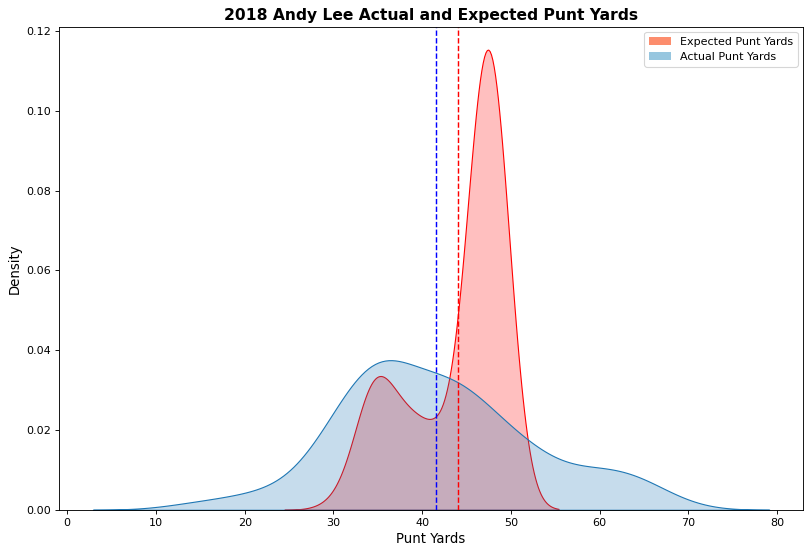

In [266]:
figure(figsize=(12, 8), dpi=80)
ax = sns.kdeplot(data=corey['KickLengthPred'], shade=True, color="red", cmap="Reds")
ax = sns.kdeplot(data=corey['kickLength'], shade=True, cmap="Blues")
handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Expected Punt Yards"),
           mpatches.Patch(facecolor=plt.cm.Blues(100), label="Actual Punt Yards")]
plt.legend(handles=handles)
plt.axvline(x=corey.kickLength.mean(),
            color='blue',
           ls='--', 
            lw=1.3)
plt.axvline(x=corey.KickLengthPred.mean(),
            color='red',
           ls='--', 
            lw=1.3)
ax = plt.title("2018 Andy Lee Actual and Expected Punt Yards", fontsize=14, fontweight='bold')
ax = plt.xlabel('Punt Yards', fontsize=12)
ax = plt.ylabel('Density', fontsize=12)

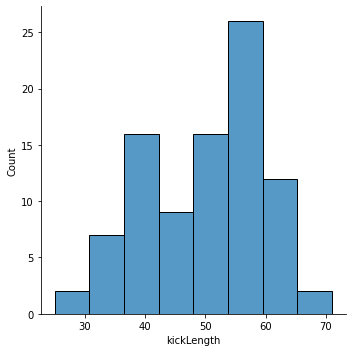

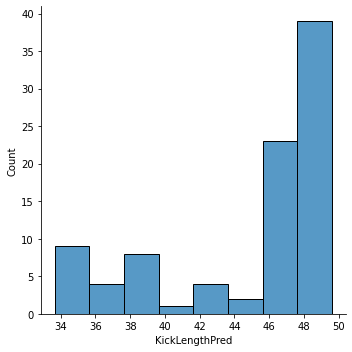

In [252]:
ax = sns.displot(jake['kickLength'])
ax = sns.displot(jake['KickLengthPred'])

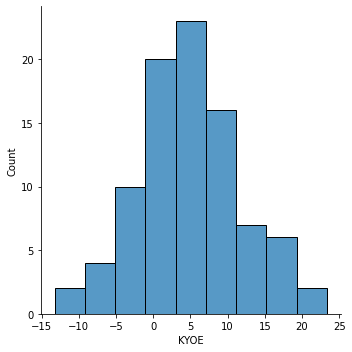

In [253]:
sns.displot(jake['KYOE']);

# Punter Trend

In [236]:
pred_punt = tests.groupby(['displayName', 'gameId'])['KYOE'].mean().rename('KYOE').reset_index()
pred_punt.sort_values(by='KYOE', ascending=False).head(20)

,displayName,gameId,KYOE
364,Corey Bojorquez,2020092701,22.757950
371,Corey Bojorquez,2020120700,19.086514
373,Corey Bojorquez,2020121900,15.474184
513,Jamie Gillan,2019101302,12.126413
1137,Sam Martin,2018102106,12.036852
262,Cameron Johnston,2020092006,11.805132
412,Dustin Colquitt,2019122908,11.645274
1051,Riley Dixon,2020092000,11.571454
1270,Tress Way,2019120101,11.265757
145,Brett Kern,2020102512,11.154081


In [238]:
games = pd.read_csv('games.csv', usecols=['gameId', 'week', 'season'])
games.drop_duplicates(subset=['gameId', 'week', 'season'], keep='first', inplace=True)
games

,gameId,season,week
0,2018090600,2018,1
1,2018090900,2018,1
2,2018090901,2018,1
3,2018090902,2018,1
4,2018090903,2018,1
...,...,...,...
759,2021010311,2020,17
760,2021010312,2020,17
761,2021010313,2020,17
762,2021010314,2020,17


In [239]:
full = pred_punt.merge(games, how='inner', on=['gameId'])
full

,displayName,gameId,KYOE,season,week
0,A.J. Cole,2019092205,7.707564,2019,3
1,Britton Colquitt,2019092205,3.927694,2019,3
2,A.J. Cole,2019092905,3.141705,2019,4
3,Rigoberto Sanchez,2019092905,-0.543932,2019,4
4,A.J. Cole,2019100605,0.082587,2019,5
...,...,...,...,...,...
1333,Tommy Townsend,2021010306,-9.340862,2020,17
1334,Ty Long,2021010306,-0.581169,2020,17
1335,Tress Way,2018111806,-2.116793,2018,11
1336,Trevor Daniel,2018111806,-17.481108,2018,11


In [240]:
full.sort_values(by='KYOE', ascending=False).head(20)

,displayName,gameId,KYOE,season,week
650,Corey Bojorquez,2020092701,22.757950,2020,3
659,Corey Bojorquez,2020120700,19.086514,2020,13
663,Corey Bojorquez,2020121900,15.474184,2020,15
834,Jamie Gillan,2019101302,12.126413,2019,6
1132,Sam Martin,2018102106,12.036852,2018,7
484,Cameron Johnston,2020092006,11.805132,2020,2
707,Dustin Colquitt,2019122908,11.645274,2019,17
1243,Riley Dixon,2020092000,11.571454,2020,2
1207,Tress Way,2019120101,11.265757,2019,13
281,Brett Kern,2020102512,11.154081,2020,7


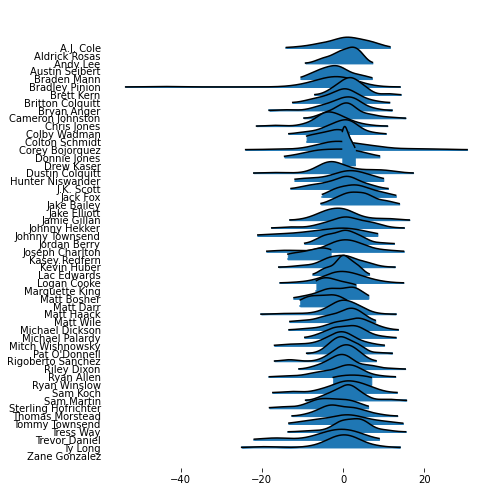

In [241]:
import joypy
%matplotlib inline
fig, axes = joypy.joyplot(full, by="displayName", column='KYOE',
                         
                  range_style='own',
                         figsize=(7,7))

In [242]:
jake = full[full['displayName']=='Jake Bailey']
jake.sort_values(by='KYOE', ascending=False)

,displayName,gameId,KYOE,season,week
152,Jake Bailey,2020110900,11.076468,2020,9
123,Jake Bailey,2020112906,10.469940,2020,12
822,Jake Bailey,2020120611,10.117794,2020,13
812,Jake Bailey,2020092013,7.184849,2020,2
816,Jake Bailey,2020101812,6.018104,2020,6
666,Jake Bailey,2020122800,5.895764,2020,16
804,Jake Bailey,2019110311,5.703032,2019,9
824,Jake Bailey,2020121000,5.692558,2020,14
814,Jake Bailey,2020100501,5.627350,2020,4
826,Jake Bailey,2020122007,4.983736,2020,15


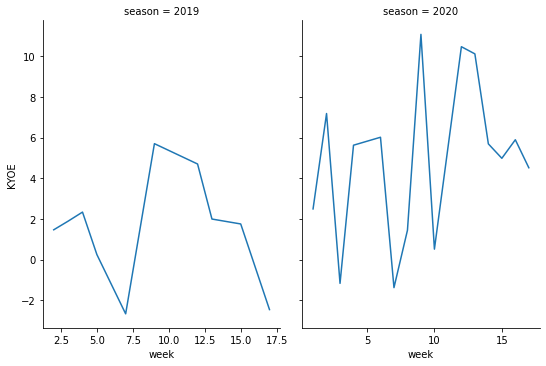

In [244]:
# Plot the lines on two facets
sns.relplot(
    data=jake,
    x="week", y="KYOE",
 col="season",
    kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=False),
);

In [212]:
dickson = tests[tests['displayName']=='Michael Dickson']
dickson = dickson[dickson['season']==2020]
dickson

,s,a,dis,o,dir,event,frameId,gameId,playId,season,team,position,displayName,quarter,oppMean,oppMinDist,oppMateDistRatio,mateMinDist,diffDir,EZ_dist,yardsToGo,preSnapHomeScore,preSnapVisitorScore,absoluteYardlineNumber,Temperature,Humidity,Precipitation,WindSpeed,kickLength,AngleDiff,ScoreDiff,KickLengthPred,KYOE
4199,0.02,0.02,0.01,274.28,266.03,ball_snap,11,2021010315,175,2020,away,P,Michael Dickson,1,15.330975,15.330975,0.205330,8.500053,7.39,72.558086,12,0,0,77,59.00,25.0,0.0,0.00,47.0,8.25,0.0,47.844425,-0.844425
4201,0.00,0.00,0.00,157.43,67.99,ball_snap,11,2021010315,386,2020,away,P,Michael Dickson,1,14.723780,14.723780,0.179158,8.291182,70.32,78.617881,1,0,0,84,59.00,25.0,0.0,0.00,63.0,89.44,0.0,48.357647,14.642353
4205,0.00,0.00,0.01,128.34,347.18,ball_snap,11,2021010315,1479,2020,away,P,Michael Dickson,2,15.396808,15.396808,0.181685,9.390021,14.58,82.075989,19,0,6,33,59.00,25.0,0.0,0.00,61.0,141.16,6.0,48.252979,12.747021
4206,0.02,0.33,0.02,259.78,58.49,ball_snap,11,2021010315,2235,2020,away,P,Michael Dickson,3,14.886464,14.886464,0.183053,8.563650,284.64,77.933121,8,6,6,37,59.00,25.0,0.0,0.00,43.0,158.71,0.0,48.526440,-5.526440
4207,0.00,0.00,0.00,277.59,293.91,ball_snap,11,2021010315,2497,2020,away,P,Michael Dickson,3,14.551210,14.551210,0.176599,8.405950,30.66,78.684299,9,9,6,36,59.00,25.0,0.0,0.00,52.0,16.32,-3.0,48.648388,3.351612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11528,2.85,1.69,0.29,111.42,117.84,punt,34,2020092013,3120,2020,home,P,Michael Dickson,4,4.829182,4.829182,0.053318,5.709790,123.10,77.518411,12,28,23,33,69.26,55.0,0.0,5.59,63.0,6.42,5.0,50.431648,12.568352
11530,2.83,1.94,0.30,95.69,116.35,punt,32,2020092013,3886,2020,home,P,Michael Dickson,4,5.006925,5.006925,0.060068,4.644308,179.95,70.380250,1,35,30,41,69.26,55.0,0.0,5.59,50.0,20.66,5.0,49.961304,0.038696
11539,2.60,2.70,0.28,278.53,294.13,punt,31,2020091300,1333,2020,away,P,Michael Dickson,2,4.554119,4.554119,0.049547,5.120703,205.65,78.730584,13,9,14,88,79.88,67.0,0.0,7.46,53.0,15.60,5.0,49.417122,3.582878
11541,2.55,2.31,0.27,277.78,275.85,punt,31,2020091300,1656,2020,away,P,Michael Dickson,2,4.137560,4.137560,0.059602,4.211425,198.25,55.975317,2,9,14,65,79.88,67.0,0.0,7.46,44.0,1.93,5.0,44.296700,-0.296700


In [213]:
from scipy.stats import mannwhitneyu
# compare samples
stat, p = mannwhitneyu(dickson['kickLength'], dickson['KickLengthPred'])
print('Statistics=%.3f, p=%.6f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=4526.000, p=0.000159
Different distribution (reject H0)


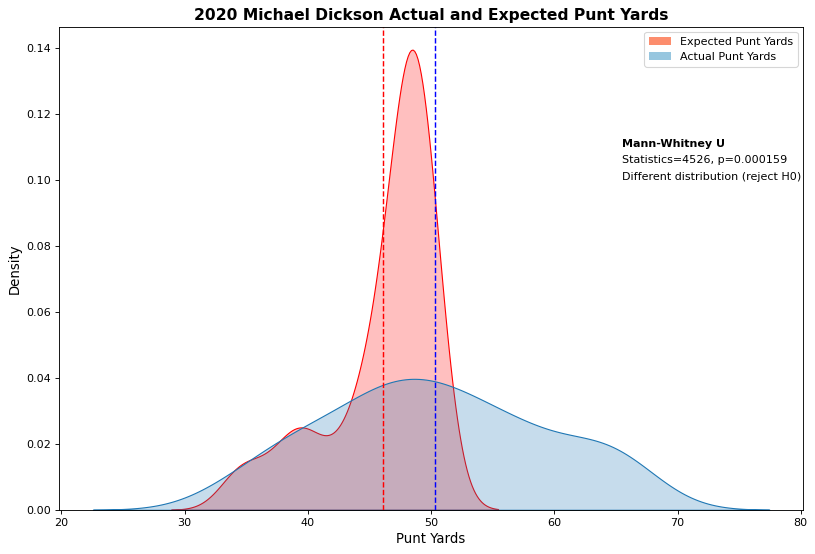

In [214]:
import matplotlib.patches as  mpatches
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

figure(figsize=(12, 8), dpi=80)
ax = sns.kdeplot(data=dickson['KickLengthPred'], shade=True, color="red", cmap="Reds")
ax = sns.kdeplot(data=dickson['kickLength'], shade=True, cmap="Blues")
handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Expected Punt Yards"),
           mpatches.Patch(facecolor=plt.cm.Blues(100), label="Actual Punt Yards")]
plt.legend(handles=handles)
ax = plt.title("2020 Michael Dickson Actual and Expected Punt Yards", fontsize=14, fontweight='bold')
plt.axvline(x=dickson.kickLength.mean(),
            color='blue',
           ls='--', 
            lw=1.3)
plt.axvline(x=dickson.KickLengthPred.mean(),
            color='red',
           ls='--', 
            lw=1.3)
ax = plt.xlabel('Punt Yards', fontsize=12)
ax = plt.ylabel('Density', fontsize=12)

plt.annotate('Mann-Whitney U', xy= (65.5, 0.11), fontweight='bold');
plt.annotate('Statistics=4526, p=0.000159', xy= (65.5, 0.105));
plt.annotate('Different distribution (reject H0)', xy= (65.5, 0.10));
#plt.savefig('expectedvsactual.png')

# Clutch

In [181]:
clutch = tests
clutch = clutch[clutch['quarter']==4]
clutch

,s,a,dis,o,dir,event,frameId,gameId,playId,season,team,position,displayName,quarter,oppMean,oppMinDist,oppMateDistRatio,mateMinDist,diffDir,EZ_dist,yardsToGo,preSnapHomeScore,preSnapVisitorScore,absoluteYardlineNumber,Temperature,Humidity,Precipitation,WindSpeed,kickLength,AngleDiff,ScoreDiff,KickLengthPred,KYOE
7,0.01,0.01,0.01,277.46,30.64,ball_snap,11,2018123000,4148,2018,home,P,Sam Koch,4,14.591809,14.591809,0.174484,9.405381,0.08,79.976073,11,26,24,86,42.98,70.0,0.000,0.00,51.0,113.18,2.0,47.322620,3.677380
13,0.00,0.00,0.00,79.99,129.87,ball_snap,11,2018123001,3338,2018,home,P,Matt Darr,4,15.062244,15.062244,0.193316,9.591335,132.89,75.557571,5,28,17,40,30.92,89.0,0.016,5.84,44.0,49.88,11.0,46.047592,-2.047592
14,0.39,0.20,0.04,267.88,265.65,ball_snap,3,2018123001,3462,2018,away,P,Matt Haack,4,15.245514,15.245514,0.232240,9.585223,76.61,62.835840,12,28,17,68,30.92,89.0,0.016,5.84,28.0,2.23,-11.0,43.688461,-15.688461
15,0.00,0.00,0.00,268.42,11.60,ball_snap,11,2018123001,4003,2018,away,P,Matt Haack,4,14.800932,14.800932,0.183090,8.876125,125.48,77.737834,8,42,17,83,30.92,89.0,0.016,5.84,25.0,103.18,-25.0,46.446400,-21.446400
26,0.00,0.01,0.00,98.73,254.51,ball_snap,11,2018123002,3146,2018,away,P,Sam Martin,4,14.546182,14.546182,0.174387,8.556781,55.07,79.970063,6,0,24,35,24.98,74.0,0.000,11.43,47.0,155.78,24.0,45.469166,1.530834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11631,2.10,1.90,0.22,259.77,289.30,punt,33,2020091400,3055,2020,home,P,Riley Dixon,4,5.400481,5.400481,0.067510,5.204633,225.34,66.833222,16,10,19,76,69.08,45.0,0.000,11.18,53.0,29.53,-9.0,48.754997,4.245003
11637,1.94,1.54,0.20,92.95,113.49,punt,33,2020091401,3522,2020,away,P,Brett Kern,4,4.546405,4.546405,0.053640,4.024922,183.81,71.356141,5,14,13,40,71.06,27.0,0.000,5.59,50.0,20.54,-1.0,48.981274,1.018726
11638,2.98,1.73,0.30,89.09,300.37,punt,32,2020091401,3655,2020,home,P,Sam Martin,4,5.945057,5.945057,0.085685,5.462023,162.18,57.624187,3,14,13,66,71.06,27.0,0.000,5.59,52.0,148.72,1.0,46.575066,5.424934
11639,2.33,1.60,0.24,87.10,109.13,punt,33,2020091401,3741,2020,away,P,Brett Kern,4,5.801146,5.801146,0.052936,5.037460,152.24,96.903105,10,14,13,14,71.06,27.0,0.000,5.59,47.0,22.03,-1.0,48.349930,-1.349930


In [192]:
clutchkicker = clutch[clutch['ScoreDiff']<=3]
clutchkicking = clutch[clutch['ScoreDiff']>=-3]
clutchkick = clutchkicker.append(clutchkicking, ignore_index=True)
clutchkick

,s,a,dis,o,dir,event,frameId,gameId,playId,season,team,position,displayName,quarter,oppMean,oppMinDist,oppMateDistRatio,mateMinDist,diffDir,EZ_dist,yardsToGo,preSnapHomeScore,preSnapVisitorScore,absoluteYardlineNumber,Temperature,Humidity,Precipitation,WindSpeed,kickLength,AngleDiff,ScoreDiff,KickLengthPred,KYOE
0,0.01,0.01,0.01,277.46,30.64,ball_snap,11,2018123000,4148,2018,home,P,Sam Koch,4,14.591809,14.591809,0.174484,9.405381,0.08,79.976073,11,26,24,86,42.98,70.0,0.000,0.00,51.0,113.18,2.0,47.322620,3.677380
1,0.39,0.20,0.04,267.88,265.65,ball_snap,3,2018123001,3462,2018,away,P,Matt Haack,4,15.245514,15.245514,0.232240,9.585223,76.61,62.835840,12,28,17,68,30.92,89.0,0.016,5.84,28.0,2.23,-11.0,43.688461,-15.688461
2,0.00,0.00,0.00,268.42,11.60,ball_snap,11,2018123001,4003,2018,away,P,Matt Haack,4,14.800932,14.800932,0.183090,8.876125,125.48,77.737834,8,42,17,83,30.92,89.0,0.016,5.84,25.0,103.18,-25.0,46.446400,-21.446400
3,0.01,0.01,0.00,276.31,245.73,ball_snap,11,2018123003,3020,2018,away,P,Logan Cooke,4,14.631080,14.631080,0.165019,9.847523,157.98,85.130181,12,17,3,91,45.50,97.0,0.051,4.72,46.0,30.58,-14.0,49.174278,-3.174278
4,0.00,0.00,0.00,313.11,269.32,ball_snap,11,2018123003,3377,2018,away,P,Logan Cooke,4,14.813038,14.813038,0.180217,9.643205,194.72,79.109403,20,20,3,85,45.50,97.0,0.051,4.72,50.0,43.79,-17.0,50.463642,-0.463642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,2.20,1.45,0.23,98.21,289.32,punt,33,2020091312,4144,2020,home,P,Johnny Hekker,4,4.967343,4.967343,0.075177,4.370046,170.08,52.533332,1,20,17,61,72.86,61.0,0.000,6.84,42.0,168.89,3.0,41.660583,0.339417
2828,1.94,1.54,0.20,92.95,113.49,punt,33,2020091401,3522,2020,away,P,Brett Kern,4,4.546405,4.546405,0.053640,4.024922,183.81,71.356141,5,14,13,40,71.06,27.0,0.000,5.59,50.0,20.54,-1.0,48.981274,1.018726
2829,2.98,1.73,0.30,89.09,300.37,punt,32,2020091401,3655,2020,home,P,Sam Martin,4,5.945057,5.945057,0.085685,5.462023,162.18,57.624187,3,14,13,66,71.06,27.0,0.000,5.59,52.0,148.72,1.0,46.575066,5.424934
2830,2.33,1.60,0.24,87.10,109.13,punt,33,2020091401,3741,2020,away,P,Brett Kern,4,5.801146,5.801146,0.052936,5.037460,152.24,96.903105,10,14,13,14,71.06,27.0,0.000,5.59,47.0,22.03,-1.0,48.349930,-1.349930


In [193]:
actual_tb = clutchkick.groupby(['displayName', 'gameId', 'season'])['kickLength'].mean()
actual_tb

displayName    gameId      season
A.J. Cole      2019092905  2019      48.0
               2019100605  2019      46.0
               2019102004  2019      47.0
               2019102704  2019      36.0
               2019112406  2019      43.0
                                     ... 
Ty Long        2020112901  2020      54.0
               2020120611  2020      58.0
               2020121310  2020      52.0
               2020122702  2020      50.0
Zane Gonzalez  2019092208  2019      40.0
Name: kickLength, Length: 833, dtype: float64

In [194]:
actual_tb.to_csv('actual_tb.csv')

In [195]:
actual = pd.read_csv('actual_tb.csv')
actual

,displayName,gameId,season,kickLength
0,A.J. Cole,2019092905,2019,48.0
1,A.J. Cole,2019100605,2019,46.0
2,A.J. Cole,2019102004,2019,47.0
3,A.J. Cole,2019102704,2019,36.0
4,A.J. Cole,2019112406,2019,43.0
...,...,...,...,...
828,Ty Long,2020112901,2020,54.0
829,Ty Long,2020120611,2020,58.0
830,Ty Long,2020121310,2020,52.0
831,Ty Long,2020122702,2020,50.0


In [196]:
pred_punt = clutchkick.groupby(['displayName', 'gameId'])['KickLengthPred'].mean().rename('KickLengthPred').reset_index()
pred_punt.sort_values(by='KickLengthPred', ascending=False).head(20)

,displayName,gameId,KickLengthPred
780,Tress Way,2018090909,51.349541
23,Andy Lee,2019091500,50.537979
577,Mitch Wishnowsky,2020122601,50.530327
151,Cameron Johnston,2018101100,50.519276
141,Bryan Anger,2020092011,50.109379
47,Braden Mann,2020122003,50.059998
801,Tress Way,2020101108,50.048435
567,Mitch Wishnowsky,2019090811,50.031952
235,Corey Bojorquez,2020111506,49.995770
25,Andy Lee,2019101307,49.894199


In [197]:
full = pred_punt.merge(actual, how='inner', on=['displayName', 'gameId'])
full

,displayName,gameId,KickLengthPred,season,kickLength
0,A.J. Cole,2019092905,47.023991,2019,48.0
1,A.J. Cole,2019100605,47.686100,2019,46.0
2,A.J. Cole,2019102004,47.175293,2019,47.0
3,A.J. Cole,2019102704,41.774162,2019,36.0
4,A.J. Cole,2019112406,42.973057,2019,43.0
...,...,...,...,...,...
828,Ty Long,2020112901,48.043598,2020,54.0
829,Ty Long,2020120611,48.716476,2020,58.0
830,Ty Long,2020121310,49.391785,2020,52.0
831,Ty Long,2020122702,49.016422,2020,50.0


In [198]:
full['PYOE'] = full['kickLength'] - full['KickLengthPred']
full.sort_values(by='PYOE', ascending=False).head(30)

,displayName,gameId,KickLengthPred,season,kickLength,PYOE
134,Bryan Anger,2019092904,49.028908,2019,71.000000,21.971092
351,Johnny Hekker,2019121511,49.098099,2019,69.000000,19.901901
238,Corey Bojorquez,2021010300,49.103249,2020,69.000000,19.896751
236,Corey Bojorquez,2020120700,48.913486,2020,68.000000,19.086514
542,Michael Dickson,2020120609,47.395824,2020,66.000000,18.604176
672,Ryan Allen,2018111108,47.830132,2018,66.000000,18.169868
799,Tress Way,2019122904,47.715157,2019,65.500000,17.784843
342,Johnny Hekker,2019091512,48.856304,2019,66.000000,17.143696
539,Michael Dickson,2020102508,49.177498,2020,66.000000,16.822502
20,Andy Lee,2018120203,47.410309,2018,64.000000,16.589691


In [199]:
final = full.groupby(['displayName', 'season'])['PYOE'].mean().rename('Clutch').reset_index()
final.sort_values(by='Clutch', ascending=False).head(20)

,displayName,season,Clutch
31,Corey Bojorquez,2020,10.233998
76,Michael Dickson,2020,7.335366
93,Ryan Winslow,2019,5.971115
43,Jake Bailey,2020,5.795353
48,Johnny Hekker,2019,5.496985
55,Joseph Charlton,2020,4.351441
92,Ryan Allen,2020,3.967583
35,Dustin Colquitt,2019,3.859674
51,Johnny Townsend,2020,3.573105
106,Tress Way,2019,3.565338


In [203]:
#final.to_csv('clutchpunting.csv', index=False)